In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as integrate
import matplotlib
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23) 

The macro-magntifications mu are 1/[(1 - kappa)^2 - gamma^2] <br>
<br>
So the macro-predictions are -2.5log(mu) + unmagnified apparent magnitude of quasar. <br>
<br>
  A          B         C        D <br>
 1.03E-01  1.68E+00  2.86E+00  3.11E+00<br>
  min        min      saddle    saddle   3 mag <=> factor of 16.<br>
<br>
If A were magnitfied by 12.6936, D would be magnified by<br>
less than 1, meaning no micro-minima.  Same story for C.<br>
But A is probably micro-magnified.<br>
<br>
<br>
Here are kappas and gammas for its four images:<br>
        x             y           kappa         gamma<br>
 A -1.934633e-03  2.842221e-03  4.747815e-01  4.439307e-01  1.327487e+01<br>
 B -4.226144e-02 -1.804457e+00  4.259092e-01  3.893498e-01 -1.390233e+01<br>
 C  9.607647e-01 -6.935695e-01  5.720462e-01  6.038433e-01 -7.918971e+01<br>
 D -5.425104e-01 -4.143636e-01  5.331661e-01  5.572576e-01  6.000388e+01<br>

Stellar fraction — do (.1,.2,.5 and 1) or (.1, .3, 1)
_____
______


0_ signifies kappa_star / kappa_tot = 0.01 * (10^0.1)^0 = 0.01 <br>
1_ signifies kappa_star / kappa_tot = 0.01 * (10^0.1)^1 <br>
2_ signifies kappa_star / kappa_tot = 0.01 * (10^0.1)^2 <br>
... <br>
10_ signifies kappa_star / kappa_tot = 0.01 * (10^0.1)^10 = 0.1 <br>
... <br>
20_ signifies kappa_star / kappa_tot = 0.01 * (10^0.1)^20 = 1

<br>
<br>
10% ~ 0.01 * (10^0.1)^10 = 0.1000 <br>
20% ~ 0.01 * (10^0.1)^13 = 0.1995 <br>
30% ~ 0.01 * (10^0.1)^15 = 0.3162 <br>
50% ~ 0.01 * (10^0.1)^17 = 0.5012 <br>
100% ~ 0.01 * (10^0.1)^20 = 1.000 <br>

In [2]:
filenames = [
'15_col1_numminima_col2_numrays_col3_counts.txt'
]


foldernames = [
'kappa_0.474782_gamma_0.443931',
'kappa_0.425909_gamma_0.38935',
'kappa_0.572046_gamma_0.603843',
'kappa_0.533166_gamma_0.557258'
]

## import data

In [3]:
data_zero = [[], [], [], []]
data_all = [[], [], [], []]

for ii in range(0, len(foldernames)):
    folder = foldernames[ii]
    for jj in range(0, len(filenames)):
        file = filenames[jj]
        dataset = pd.read_csv('sim_files/' + folder + '/' + file, dtype = int, delimiter = ' ', header = None)
        dataset.columns = ['micro-minima', 'number of rays', 'count']
        
        data_zero[ii] = dataset[dataset['micro-minima'] == 0]
        summed_rays = dataset.groupby('number of rays')['count'].sum()
        data_all[ii] = pd.DataFrame({'number of rays':summed_rays.index, 'count':summed_rays.values})

        
  


#### make sure that the 6 datasets each have the same minimum and maximum value in "number of rays" space so that when we switch to magnitude space the distributions are spaced correctly

## cell below takes a while and is only important for "pre-processing" un-comment out if converting to magnitude space

In [4]:
'''
min_rays = np.inf
max_rays = -np.inf
for dataset in data_all:
    if np.min(dataset['number of rays']) < min_rays:
        min_rays = np.min(dataset['number of rays'])
    
    if np.max(dataset['number of rays']) > max_rays:
        max_rays = np.max(dataset['number of rays'])
        
print(min_rays, max_rays)
nrays_array = np.arange(min_rays,max_rays+1,1)
for ii in range(0, len(data_all)):
    dataset = data_all[ii]
    print(np.min(dataset['number of rays']), np.max(dataset['number of rays']))
    for nrays in nrays_array:
        if nrays not in dataset['number of rays']:
            data_all[ii] = data_all[ii].append(pd.DataFrame({'number of rays':[nrays], 'count':[0]}))
            

for ii in range(2, len(data_zero)):
    dataset = data_zero[ii]
    print(np.min(dataset['number of rays']), np.max(dataset['number of rays']))
    for nrays in nrays_array:
        if nrays not in dataset['number of rays']:
            data_zero[ii] = data_zero[ii].append(pd.DataFrame({'number of rays':[nrays], 'count':[0]}))
            
'''

"\nmin_rays = np.inf\nmax_rays = -np.inf\nfor dataset in data_all:\n    if np.min(dataset['number of rays']) < min_rays:\n        min_rays = np.min(dataset['number of rays'])\n    \n    if np.max(dataset['number of rays']) > max_rays:\n        max_rays = np.max(dataset['number of rays'])\n        \nprint(min_rays, max_rays)\nnrays_array = np.arange(min_rays,max_rays+1,1)\nfor ii in range(0, len(data_all)):\n    dataset = data_all[ii]\n    print(np.min(dataset['number of rays']), np.max(dataset['number of rays']))\n    for nrays in nrays_array:\n        if nrays not in dataset['number of rays']:\n            data_all[ii] = data_all[ii].append(pd.DataFrame({'number of rays':[nrays], 'count':[0]}))\n            \n\nfor ii in range(2, len(data_zero)):\n    dataset = data_zero[ii]\n    print(np.min(dataset['number of rays']), np.max(dataset['number of rays']))\n    for nrays in nrays_array:\n        if nrays not in dataset['number of rays']:\n            data_zero[ii] = data_zero[ii].append

#### make an initial plot of our data in number of rays vs. count space

Maybe the best way to think about this is to consider 0 for D (all for 
the rest) and all for D (and the rest) and just take the ratio.
Likewise 0 and all for C.  And finally 0 for C *and* 0 for D and all for
the A&B and then simply all and again take the ratio.  Altogether
4 cases:  uno) 0 for D  dos: 0 for C tres:  0 for both quatro:  All.
uno/quatro gives probability that D is in the ground state.  Likewise
duo/quatro.  And tres/quatro gives the probability that both are.

let's plot these 4 combinations in # of pixel vs. count space

------
-------

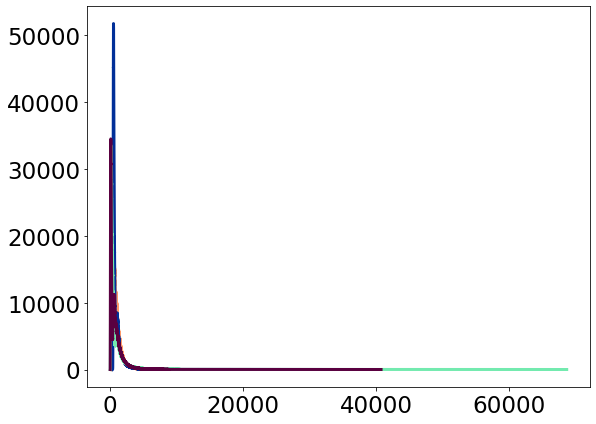

In [5]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(1, figsize = [9,7])


ax.plot(data_all[0]['number of rays'], data_all[0]['count'], linewidth = 3, color = colors[0], linestyle = 'solid')
ax.plot(data_all[1]['number of rays'], data_all[1]['count'], linewidth = 3, color = colors[1], linestyle = 'solid')
ax.plot(data_all[2]['number of rays'], data_all[2]['count'], linewidth = 3, color = colors[2], linestyle = 'solid')
ax.plot(data_all[3]['number of rays'], data_all[3]['count'], linewidth = 3, color = colors[3], linestyle = 'solid')

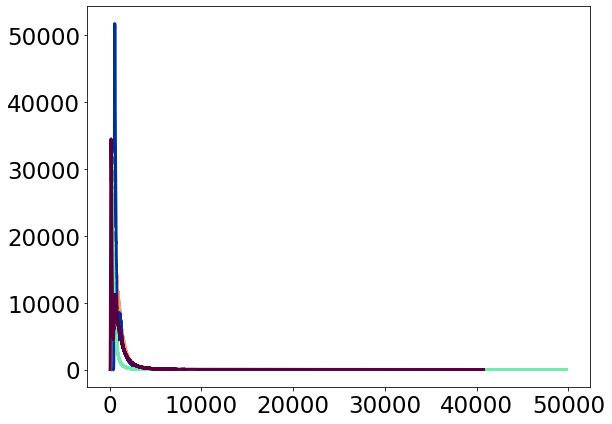

In [6]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(1, figsize = [9,7])


ax.plot(data_all[0]['number of rays'], data_all[0]['count'], linewidth = 3, color = colors[0], linestyle = 'solid')
ax.plot(data_all[1]['number of rays'], data_all[1]['count'], linewidth = 3, color = colors[1], linestyle = 'solid')
ax.plot(data_zero[2]['number of rays'], data_zero[2]['count'], linewidth = 3, color = colors[2], linestyle = 'solid')
ax.plot(data_all[3]['number of rays'], data_all[3]['count'], linewidth = 3, color = colors[3], linestyle = 'solid')


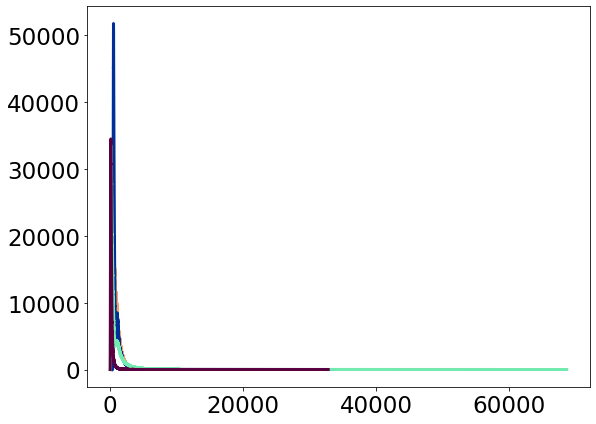

In [7]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(1, figsize = [9,7])


ax.plot(data_all[0]['number of rays'], data_all[0]['count'], linewidth = 3, color = colors[0], linestyle = 'solid')
ax.plot(data_all[1]['number of rays'], data_all[1]['count'], linewidth = 3, color = colors[1], linestyle = 'solid')
ax.plot(data_all[2]['number of rays'], data_all[2]['count'], linewidth = 3, color = colors[2], linestyle = 'solid')
ax.plot(data_zero[3]['number of rays'], data_zero[3]['count'], linewidth = 3, color = colors[3], linestyle = 'solid')

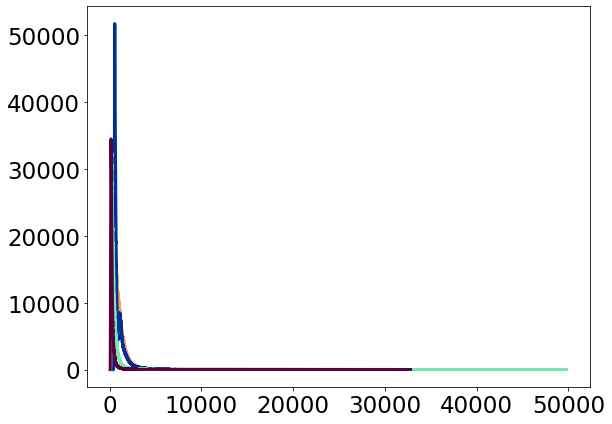

In [8]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(1, figsize = [9,7])


ax.plot(data_all[0]['number of rays'], data_all[0]['count'], linewidth = 3, color = colors[0], linestyle = 'solid')
ax.plot(data_all[1]['number of rays'], data_all[1]['count'], linewidth = 3, color = colors[1], linestyle = 'solid')
ax.plot(data_zero[2]['number of rays'], data_zero[2]['count'], linewidth = 3, color = colors[2], linestyle = 'solid')
ax.plot(data_zero[3]['number of rays'], data_zero[3]['count'], linewidth = 3, color = colors[3], linestyle = 'solid')

### these plots don't really tell us much, as we must convert to magnitude space and normalize the data

#### let's do that!

In [9]:
#find's the magnitude zero point of a PDF, this is calculated by taking the weighted mean (by number of counts) 
#of the number of rays in the microlensing simulation

def find_mag_zero_point(dataset):
    avg = np.average(dataset['number of rays'], weights = dataset['count'])
    return np.round(-2.5*np.log10(avg), 1)


In [10]:
#returns the nearest element in an array from a given value
def find_nearest(array, value):
    index = (np.abs(array - value)).argmin()
    return array[index]

In [11]:
#this is a complicated function, but the fundamental goal here is to convert to magnitude space
#it get's complicated because we must "bin" in magnitude space practically as we have integer
#steps in number of rays space. these integer steps won't translate perfectly to the magnitude
#space bins. so, in order convert to magnitude space, we setup our magnitude bins and step through the
#number of rays space, and divide the proportion of the number of rays into the relevant bins by the proportion
#of the bin that it covers

def bin_to_magnitude_space(dataset, binsize_mag = 1./256.):
    nrays_array = dataset['number of rays'].values
    count_array = dataset['count'].values
    mag_zero_point = find_mag_zero_point(dataset)
    print(mag_zero_point)
    
    #initialize the output pandas dataframe
    dataset_mag = pd.DataFrame(columns = ['magnitude', 'count'])
    
    nrays_min = nrays_array.min()
    nrays_max = nrays_array.max()
    mag_min = -2.5*np.log10(nrays_max)
    mag_max = -2.5*np.log10(nrays_min)

    #define magnitude bins
    mag_bins = np.arange(mag_min, mag_max, binsize_mag)
    for mag in mag_bins:        
        dataset_mag.loc[len(dataset_mag.index)] = [mag, 0]
    
    
    #step through number of rays (integer) space
    for ii in range(0, len(nrays_array)):
        count = count_array[ii]

        
        #determine the middle, left, and right location of the current number of rays bin
        nrays_middle = nrays_array[ii]
        nrays_left = nrays_array[ii]-0.5
        nrays_right = nrays_array[ii]+0.5
        
        #convert this to magnitude space
        int_middle = -2.5*np.log10(nrays_middle)
        int_left = -2.5*np.log10(nrays_left)
        int_right = -2.5*np.log10(nrays_right)
        
        
        #find the nearest magnitude bin that corresponds to the middle of the number of rays in mag space
        #define the left and right cutoff for several bins to the left and right in case of spillover
        mag_middle = find_nearest(mag_bins, int_middle)
        mag_left = mag_middle + (binsize_mag/2.)
        next1_mag_left = mag_middle + (3*binsize_mag/2.)
        next2_mag_left = mag_middle + (5*binsize_mag/2.)
        next3_mag_left = mag_middle + (7*binsize_mag/2.)
        
        mag_right = mag_middle - (binsize_mag/2.)
        next1_mag_right = mag_middle - (3*binsize_mag/2.)
        next2_mag_right = mag_middle - (5*binsize_mag/2.)
        next3_mag_right = mag_middle - (7*binsize_mag/2.)
            
        
        #determine the fraction of the count to be placed in the each magnitude bin
        frac_next2_left, frac_next1_left, frac_left, frac_middle, frac_right, frac_next1_right, frac_next2_right = None, None, None, None, None, None, None
        if int_left - mag_middle > mag_left - mag_middle:
            if int_right - mag_middle < mag_right - mag_middle:
                frac_middle = 1
            if int_left - mag_middle > next1_mag_left - mag_middle:
                if int_left - mag_middle > next2_mag_left - mag_middle:
                    frac_next2_left = ((int_left-next2_mag_left)/(next3_mag_left-next2_mag_left))
                    frac_next1_left = 1
                    frac_left = 1
                
                else:
                    frac_next1_left = ((int_left-next1_mag_left)/(next2_mag_left-next1_mag_left))
                    frac_left = 1
                    
            else:
                frac_left = ((int_left-mag_left)/(next1_mag_left-mag_left))
                
            if int_right - mag_middle > mag_right - mag_middle:
                frac_middle = ((int_right-mag_left)/(mag_right-mag_left))
            
            
                    
                    
        if int_right - mag_middle < mag_right - mag_middle:
            if int_right - mag_middle < next1_mag_right - mag_middle:
                if int_right - mag_middle < next2_mag_right - mag_middle:
                    frac_next2_right = ((int_right-next2_mag_right)/(next3_mag_right-next2_mag_right))
                    frac_next1_right = 1
                    frac_right = 1
                
                else:
                    frac_next1_right = ((int_right-next1_mag_right)/(next2_mag_right-next1_mag_right))
                    frac_right = 1
                        
            else:
                frac_right = ((int_right-mag_right)/(next1_mag_right-mag_right))
                              
            if int_left - mag_middle < mag_left - mag_middle:
                frac_middle = ((int_left-mag_right)/(mag_left-mag_right))
                
        elif int_left - mag_middle < mag_left - mag_middle:
            frac_middle = ((int_left-int_right)/(mag_left-mag_right))
            

            
        if frac_next2_left == None:
            frac_next2_left = 0
            
        if frac_next1_left == None:
            frac_next1_left = 0
        
        if frac_left == None:
            frac_left = 0
        
        if frac_right == None:
            frac_right = 0
        
        if frac_next1_right == None:
            frac_next1_right = 0
        
        if frac_next2_right == None:
            frac_next2_right = 0
            
            
    
        #make an array of the proportion of the count per bin
        proportions = np.array([frac_next2_left, frac_next1_left, frac_left, frac_middle, frac_right, frac_next1_right, frac_next2_right]) 
        
        #if true, you need another bin in magnitude space
        if proportions.any() > 1:
            print("error, fraction greater than 1!")
        
        
        total = np.sum(proportions)
        proportions = proportions/total        

        counts_per_bin = count*proportions
        
        #make our output pandas dataframe
        dataset_mag.loc[dataset_mag.magnitude == mag_middle+3*binsize_mag, 'count'] += counts_per_bin[0]
        dataset_mag.loc[dataset_mag.magnitude == mag_middle+2*binsize_mag, 'count'] += counts_per_bin[1]
        dataset_mag.loc[dataset_mag.magnitude == mag_middle+binsize_mag, 'count'] += counts_per_bin[2]

        dataset_mag.loc[dataset_mag.magnitude == mag_middle, 'count'] += counts_per_bin[3]

        dataset_mag.loc[dataset_mag.magnitude == mag_middle-binsize_mag, 'count'] += counts_per_bin[4]
        dataset_mag.loc[dataset_mag.magnitude == mag_middle-2*binsize_mag, 'count'] += counts_per_bin[5]
        dataset_mag.loc[dataset_mag.magnitude == mag_middle-3*binsize_mag, 'count'] += counts_per_bin[6]
        
        
        dataset_mag['normalized count'] = dataset_mag['count'] / integrate.simps(dataset_mag['count'], x = dataset_mag['magnitude'])
        dataset_mag['shifted magnitude'] = dataset_mag['magnitude'] - mag_zero_point
        


    return dataset_mag
            
            
            

        
        

## below takes a lot of time to run --> skip if not needed

In [12]:
## data_mag_all will contain magnitude pdf's for image A,B,C,D at 30% stellar for case with all # micro-minima
#data_mag_all = []

#for dataset in data_all:
#    dataset_mag = bin_to_magnitude_space(dataset, binsize_mag = 1./256.)
#    data_mag_all.append(dataset_mag)



## below takes a lot of time to run --> skip if not needed

In [13]:
##data_mag_zero will contain magnitude pdf's for image C,D at 30% stellar for case with only zero micro-minima
#data_mag_zero = []
    
#for ii in range(2, len(data_zero)):
#    dataset = data_zero[ii]
#    dataset_mag = bin_to_magnitude_space(dataset, binsize_mag = 1./256.)
#    data_mag_zero.append(dataset_mag)   

### save the magnitude space data

In [14]:
#all_filenames = ['a_all_stellar_30_apr22', 'b_all_stellar_30_apr22', 'c_all_stellar_30_apr22', 'd_all_stellar_30_apr22']

#for ii in range(0, len(data_mag_all)):
#    dataset = data_mag_all[ii]
#    filename = all_filenames[ii]
#    dataset.to_csv('./sim_data_magnitude/' + filename, index=False)
    
    
#zero_filenames = ['c_zero_stellar_30_apr22', 'd_zero_stellar_30_apr22']

#for ii in range(0, len(data_mag_zero)):
#    dataset = data_mag_zero[ii]
#    filename = zero_filenames[ii]
#    dataset.to_csv('./sim_data_magnitude/' + filename, index=False)

## import 30% stellar magnitude files previously determined using above and make sure that each microlensing PDF has all the same range for magnitudes. if not, add a count of zero in those locations.

In [15]:

filenames = ['sim_data_magnitude/a_all_stellar_30_may14', 'sim_data_magnitude/b_all_stellar_30_may14', 'sim_data_magnitude/c_all_stellar_30_may14', 'sim_data_magnitude/d_all_stellar_30_may14', 'sim_data_magnitude/c_zero_stellar_30_may14', 'sim_data_magnitude/d_zero_stellar_30_may14']
data_all = []
for ii in range(0, len(filenames)):
    data_all.append(pd.read_csv(filenames[ii], delimiter = ',', dtype=float))


normed_count = []
magnitude = []
for dataset in data_all:
    normed_count.append(np.round(dataset['normalized count'].tolist(), 8))
    magnitude.append(np.round(dataset['shifted magnitude'].tolist(), 8))
    


In [16]:
def align_magnitude_bins(magnitude, normed_count):
    min_mag = np.inf
    max_mag = -np.inf
    for mag in magnitude:
        if np.min(mag) < min_mag:
            min_mag = np.min(mag)

        if np.max(mag) > max_mag:
            max_mag = np.max(mag)
    
    #print('min_mag, max_mag')
    #print(min_mag, max_mag)
    magnitudes_total = np.arange(min_mag-1./256., max_mag+1./256., 1./256.)
    aligned_normed_count = []
    for ii in range(0, len(magnitude)):
        this_mag = magnitude[ii]
        this_normed_count = normed_count[ii]
        #print("initial length = ", len(this_normed_count))

        mag = np.round(min_mag, 8)
        while mag <= np.round(np.min(this_mag), 8):
            this_normed_count = np.insert(this_normed_count, 0, 0)
            mag += 1./256.

        mag = np.round(np.max(this_mag), 8)
        while mag <= max_mag:
            this_normed_count = np.insert(this_normed_count, len(this_normed_count), 0)
            mag += 1./256.

        if len(this_normed_count) < len(magnitudes_total):
            this_normed_count = np.insert(this_normed_count, len(this_normed_count), 0)
        
        elif len(this_normed_count) > len(magnitudes_total):
            magnitudes_total = np.insert(magnitudes_total, len(magnitudes_total), np.max(magnitudes_total)+1./256.)
            
        #print("final length = ", len(this_normed_count))
        #print(len(magnitudes_total))

        aligned_normed_count.append(this_normed_count)
        
    return magnitudes_total, aligned_normed_count

In [17]:
magnitudes_total, aligned_normed_count = align_magnitude_bins(magnitude, normed_count)


a30 = aligned_normed_count[0]
b30 = aligned_normed_count[1]
c30 = aligned_normed_count[2]
d30 = aligned_normed_count[3]
c_zero30 = aligned_normed_count[4]
d_zero30 = aligned_normed_count[5]



#### make a plot of our data in magnitude vs. normalized count space
#### also make a plot of the multiplication of the 4 pdfs
#### do this for all 4 combinations of PDFs

1. all micro-minima for all
2. all micro-minima for a,b,c -- zero micro-minima for d
3. all micro-minima for a,b,c -- zero micro-minima for c
4. all micro-minima for a and b -- zero micro-minima for c and d

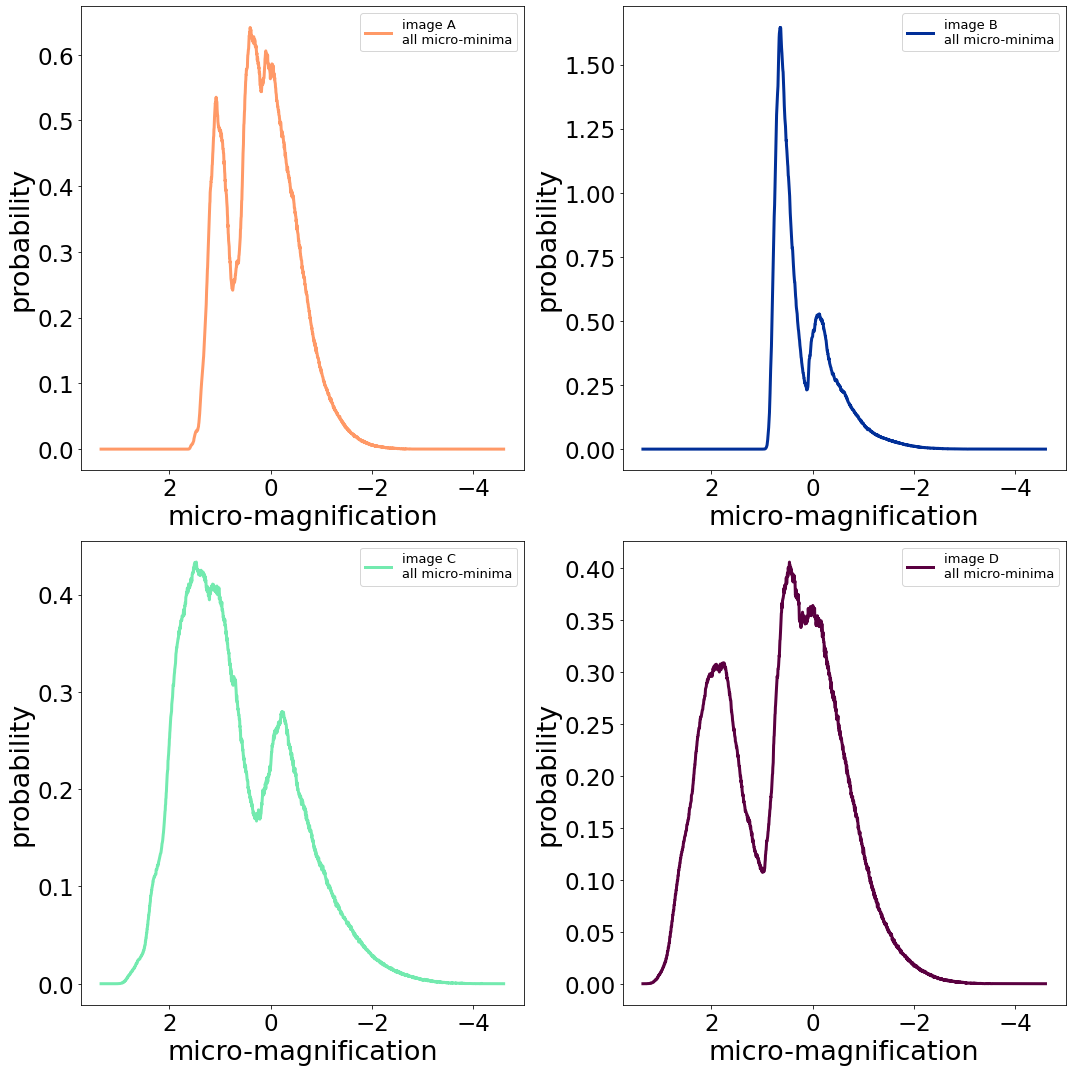

In [18]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(2, 2, figsize = [15, 15])
ax0 = ax[0][0]
ax1 = ax[0][1]
ax2 = ax[1][0]
ax3 = ax[1][1]


ax0.plot(magnitudes_total, a30, linewidth = 3, color = colors[0], linestyle = 'solid', label = 'image A\nall micro-minima')
ax1.plot(magnitudes_total, b30, linewidth = 3, color = colors[1], linestyle = 'solid', label = 'image B\nall micro-minima')
ax2.plot(magnitudes_total, c30, linewidth = 3, color = colors[2], linestyle = 'solid', label = 'image C\nall micro-minima')
ax3.plot(magnitudes_total, d30, linewidth = 3, color = colors[3], linestyle = 'solid', label = 'image D\nall micro-minima')

ax0.set_ylabel('probability', fontsize = 27)
ax1.set_ylabel('probability', fontsize = 27)
ax2.set_ylabel('probability', fontsize = 27)
ax3.set_ylabel('probability', fontsize = 27)

ax0.set_xlabel('micro-magnification', fontsize = 27)
ax1.set_xlabel('micro-magnification', fontsize = 27)
ax2.set_xlabel('micro-magnification', fontsize = 27)
ax3.set_xlabel('micro-magnification', fontsize = 27)

ax0.legend(fontsize = 13, loc=1)
ax1.legend(fontsize = 13, loc=1)
ax2.legend(fontsize = 13, loc=1)
ax3.legend(fontsize = 13, loc=1)

fig.tight_layout()
ax0.invert_xaxis()
ax1.invert_xaxis()
ax2.invert_xaxis()
ax3.invert_xaxis()

plt.savefig('figures/PDFs.pdf')

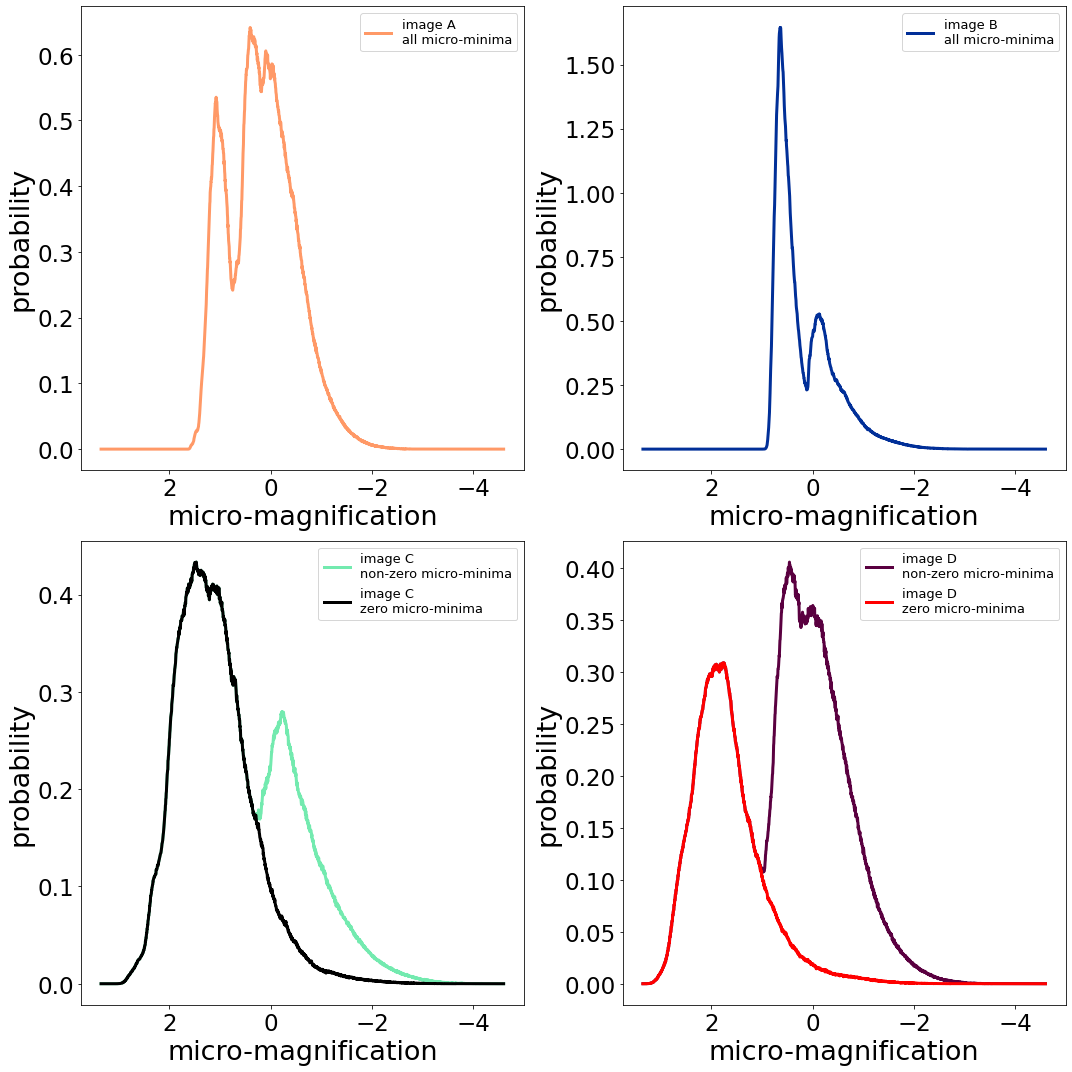

In [19]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(2, 2, figsize = [15, 15])
ax0 = ax[0][0]
ax1 = ax[0][1]
ax2 = ax[1][0]
ax3 = ax[1][1]


ax0.plot(magnitudes_total, a30, linewidth = 3, color = colors[0], linestyle = 'solid', label = 'image A \nall micro-minima')
ax1.plot(magnitudes_total, b30, linewidth = 3, color = colors[1], linestyle = 'solid', label = 'image B \nall micro-minima')
ax2.plot(magnitudes_total, c30, linewidth = 3, color = colors[2], linestyle = 'solid', label = 'image C \nnon-zero micro-minima')
ax3.plot(magnitudes_total, d30, linewidth = 3, color = colors[3], linestyle = 'solid', label = 'image D \nnon-zero micro-minima')
ax2.plot(magnitudes_total, c_zero30, linewidth = 3, color = 'k', linestyle = 'solid', label = 'image C \nzero micro-minima')
ax3.plot(magnitudes_total, d_zero30, linewidth = 3, color = 'r', linestyle = 'solid', label = 'image D \nzero micro-minima')

ax0.set_ylabel('probability', fontsize = 27)
ax1.set_ylabel('probability', fontsize = 27)
ax2.set_ylabel('probability', fontsize = 27)
ax3.set_ylabel('probability', fontsize = 27)

ax0.set_xlabel('micro-magnification', fontsize = 27)
ax1.set_xlabel('micro-magnification', fontsize = 27)
ax2.set_xlabel('micro-magnification', fontsize = 27)
ax3.set_xlabel('micro-magnification', fontsize = 27)

ax0.legend(fontsize = 13, loc=1)
ax1.legend(fontsize = 13, loc=1)
ax2.legend(fontsize = 13, loc=1)
ax3.legend(fontsize = 13, loc=1)

fig.tight_layout()
ax0.invert_xaxis()
ax1.invert_xaxis()
ax2.invert_xaxis()
ax3.invert_xaxis()

plt.savefig('figures/PDFs_zeroCD.pdf')

Text(0, 0.5, 'probability')

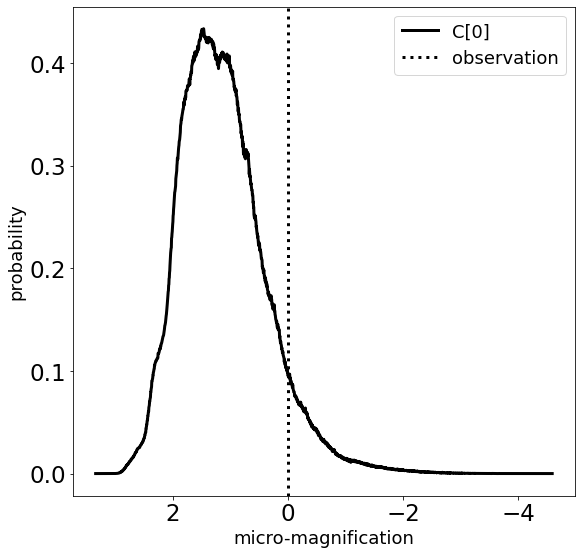

In [34]:
fig, ax = plt.subplots(1, 1, figsize = [9,9])
ax.plot(magnitudes_total, c_zero30, linewidth = 3, color = 'k', linestyle = 'solid', label = 'C[0]')
ax.axvline(0, color = 'k', linestyle = 'dotted', linewidth = 3, label = 'observation')
ax.invert_xaxis()

ax.legend(fontsize = 18, loc=1)
ax.set_xlabel('micro-magnification', fontsize = 18)
ax.set_ylabel('probability', fontsize = 18)


Text(0, 0.5, 'probability')

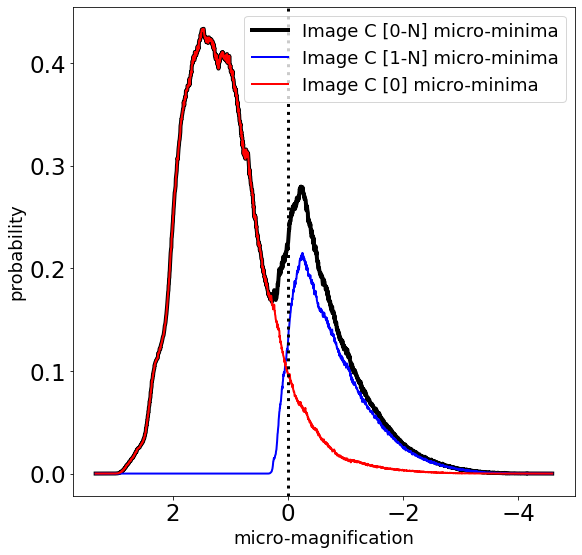

In [46]:
fig, ax = plt.subplots(1, 1, figsize = [9,9])
ax.plot(magnitudes_total, c30, linewidth = 4, color = 'k', linestyle = 'solid', label = 'Image C [0-N] micro-minima')
ax.plot(magnitudes_total, c30-c_zero30, linewidth = 2, color = 'b', linestyle = 'solid', label = 'Image C [1-N] micro-minima')
ax.plot(magnitudes_total, c_zero30, linewidth = 2, color = 'r', linestyle = 'solid', label = 'Image C [0] micro-minima')
ax.axvline(0, color = 'k', linestyle = 'dotted', linewidth = 3)
ax.invert_xaxis()

ax.legend(fontsize = 18, loc=1)
ax.set_xlabel('micro-magnification', fontsize = 18)
ax.set_ylabel('probability', fontsize = 18)

Text(0, 0.5, 'probability')

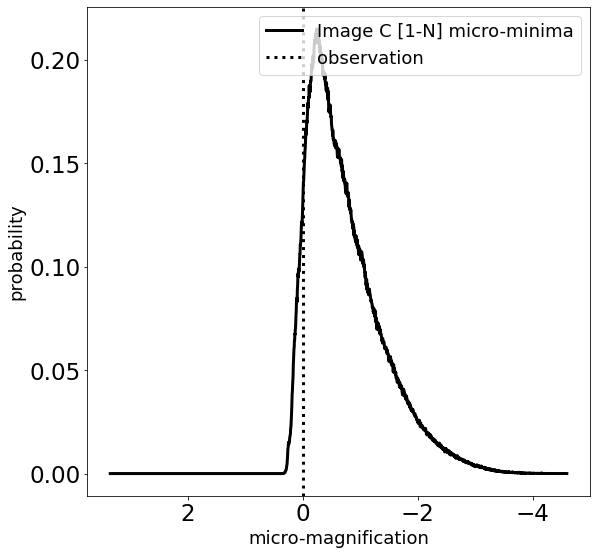

In [36]:
fig, ax = plt.subplots(1, 1, figsize = [9,9])
ax.plot(magnitudes_total, c30-c_zero30, linewidth = 3, color = 'k', linestyle = 'solid', label = 'Image C [1-N] micro-minima')
ax.axvline(0, color = 'k', linestyle = 'dotted', linewidth = 3, label = 'observation')
ax.invert_xaxis()

ax.legend(fontsize = 18, loc=1)
ax.set_xlabel('micro-magnification', fontsize = 18)
ax.set_ylabel('probability', fontsize = 18)

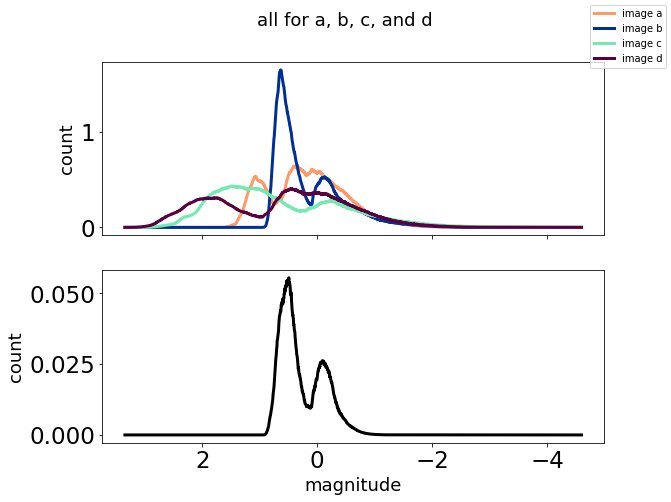

In [20]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(2, 1, figsize = [9,7], sharex = True)
ax0 = ax[0]
ax1 = ax[1]


ax0.plot(magnitudes_total, a30, linewidth = 3, color = colors[0], linestyle = 'solid', label = 'image a')
ax0.plot(magnitudes_total, b30, linewidth = 3, color = colors[1], linestyle = 'solid', label = 'image b')
ax0.plot(magnitudes_total, c30, linewidth = 3, color = colors[2], linestyle = 'solid', label = 'image c')
ax0.plot(magnitudes_total, d30, linewidth = 3, color = colors[3], linestyle = 'solid', label = 'image d')



multiplied_mag = a30*b30*c30*d30
ax1.plot(magnitudes_total, multiplied_mag, linewidth = 3, color = 'k', linestyle = 'solid')


ax0.set_ylabel('count', fontsize = 18)

ax1.set_xlabel('magnitude', fontsize = 18)
ax1.set_ylabel('count', fontsize = 18)

ax0.invert_xaxis()


fig.suptitle('all for a, b, c, and d', fontsize = 18)
fig.legend()

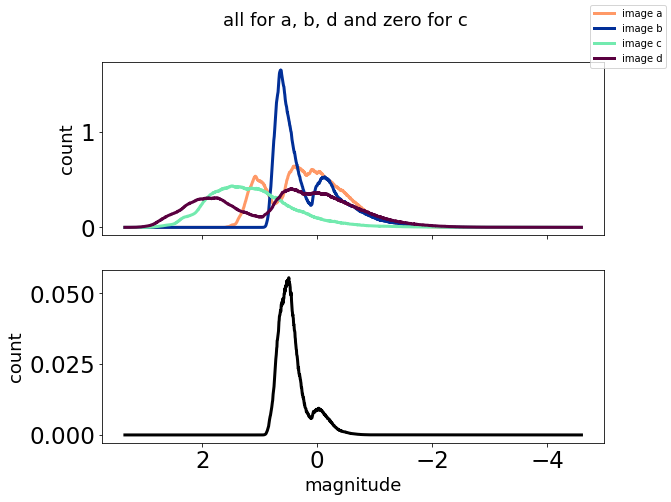

In [21]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(2, 1, figsize = [9,7], sharex = True)
ax0 = ax[0]
ax1 = ax[1]


ax0.plot(magnitudes_total, a30, linewidth = 3, color = colors[0], linestyle = 'solid', label = 'image a')
ax0.plot(magnitudes_total, b30, linewidth = 3, color = colors[1], linestyle = 'solid', label = 'image b')
ax0.plot(magnitudes_total, c_zero30, linewidth = 3, color = colors[2], linestyle = 'solid', label = 'image c')
ax0.plot(magnitudes_total, d30, linewidth = 3, color = colors[3], linestyle = 'solid', label = 'image d')



multiplied_mag = a30*b30*c_zero30*d30
ax1.plot(magnitudes_total, multiplied_mag, linewidth = 3, color = 'k', linestyle = 'solid')


ax0.set_ylabel('count', fontsize = 18)

ax1.set_xlabel('magnitude', fontsize = 18)
ax1.set_ylabel('count', fontsize = 18)
ax0.invert_xaxis()


fig.suptitle('all for a, b, d and zero for c', fontsize = 18)
fig.legend()

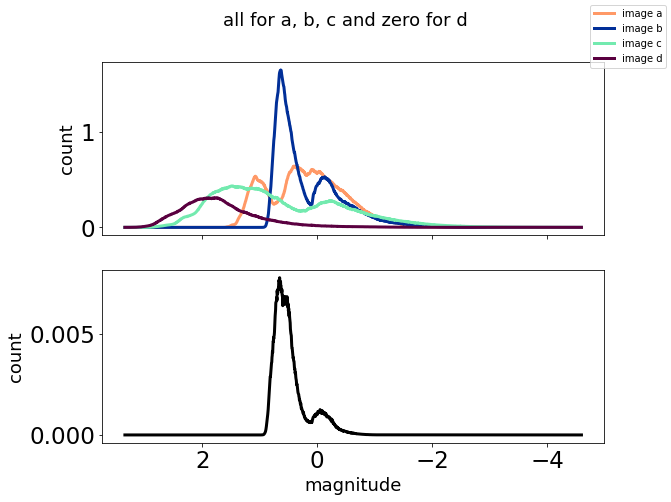

In [22]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(2, 1, figsize = [9,7], sharex = True)
ax0 = ax[0]
ax1 = ax[1]


ax0.plot(magnitudes_total, a30, linewidth = 3, color = colors[0], linestyle = 'solid', label = 'image a')
ax0.plot(magnitudes_total, b30, linewidth = 3, color = colors[1], linestyle = 'solid', label = 'image b')
ax0.plot(magnitudes_total, c30, linewidth = 3, color = colors[2], linestyle = 'solid', label = 'image c')
ax0.plot(magnitudes_total, d_zero30, linewidth = 3, color = colors[3], linestyle = 'solid', label = 'image d')



multiplied_mag = a30*b30*c30*d_zero30
ax1.plot(magnitudes_total, multiplied_mag, linewidth = 3, color = 'k', linestyle = 'solid')


ax0.set_ylabel('count', fontsize = 18)

ax1.set_xlabel('magnitude', fontsize = 18)
ax1.set_ylabel('count', fontsize = 18)
ax0.invert_xaxis()


fig.suptitle('all for a, b, c and zero for d', fontsize = 18)
fig.legend()

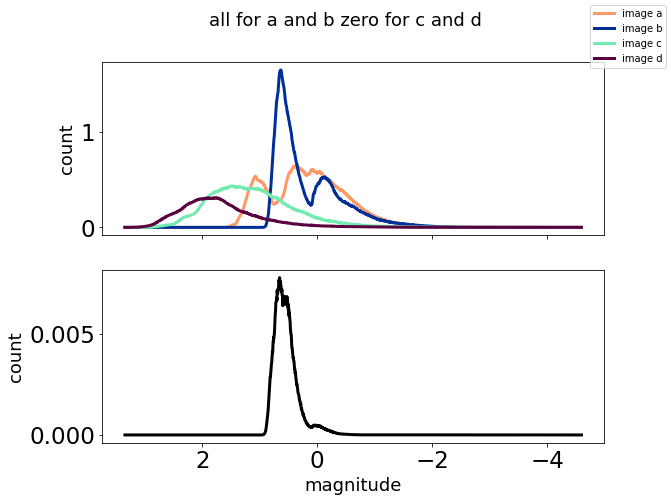

In [23]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(2, 1, figsize = [9,7], sharex = True)
ax0 = ax[0]
ax1 = ax[1]


ax0.plot(magnitudes_total, a30, linewidth = 3, color = colors[0], linestyle = 'solid', label = 'image a')
ax0.plot(magnitudes_total, b30, linewidth = 3, color = colors[1], linestyle = 'solid', label = 'image b')
ax0.plot(magnitudes_total, c_zero30, linewidth = 3, color = colors[2], linestyle = 'solid', label = 'image c')
ax0.plot(magnitudes_total, d_zero30, linewidth = 3, color = colors[3], linestyle = 'solid', label = 'image d')



multiplied_mag = a30*b30*c_zero30*d_zero30
ax1.plot(magnitudes_total, multiplied_mag, linewidth = 3, color = 'k', linestyle = 'solid')


ax0.set_ylabel('count', fontsize = 18)

ax1.set_xlabel('magnitude', fontsize = 18)
ax1.set_ylabel('count', fontsize = 18)
ax0.invert_xaxis()


fig.suptitle('all for a and b zero for c and d', fontsize = 18)
fig.legend()

1. Luke's simulations must be shifted so that the mean number of rays
   per cell (not the mean magnitude) is zero magnitudes. 

2. The macro-magntifications mu are 1/[(1 - kappa)^2 - gamma^2].

3. So the macro-predictions are -2.5log(mu) + unmagnified apparent
   magnitude of quasar.

4. This is a "don't know" case so we must integrate over all possible
   unmagnified magnitudes.

## Now we need to determine the unmagnified apparent magnitude of the quasar

#### observations are relative to reference star:
 A B C D <br>
1.03E-01 1.68E+00 2.86E+00 3.11E+00 <br>
min min saddle saddle 3 mag <=> factor of 16. <br>

##### reference star: 
The photometry is relative to a star at

09:24:50.26 +02:19:41.8 with PanSTARRS iMEANpsf = 18.211

In [144]:
ref_magnitude = 18.211
a_observed_magnitude = ref_magnitude + 1.03e-01
b_observed_magnitude = ref_magnitude + 1.68e+00
c_observed_magnitude = ref_magnitude + 2.86e+00
d_observed_magnitude = ref_magnitude + 3.11e+00


print(a_observed_magnitude)
print(b_observed_magnitude)
print(c_observed_magnitude)
print(d_observed_magnitude)

18.314
19.891
21.070999999999998
21.320999999999998


In [145]:
def macro_mag(kappa, gamma): 
    mu = 1/((1-kappa)** 2 - (gamma**2))
    return -2.5*np.log10(np.abs(mu))

        kappa         gamma        <br>
 A,     4.747815e-01,  4.439307e-01    <br>
 B,     4.259092e-01,  3.893498e-01    <br>
 C,     5.720462e-01,  6.038433e-01    <br>
 D,     5.331661e-01,  5.572576e-01  
 
 
 <br>
 <br>
 


In [146]:
a_macro_magnification = macro_mag(4.747815e-01, 4.439307e-01)
b_macro_magnification = macro_mag(4.259092e-01, 3.893498e-01)
c_macro_magnification = macro_mag(5.720462e-01, 6.038433e-01)
d_macro_magnification = macro_mag(5.331661e-01, 5.572576e-01)


In [147]:
print(a_macro_magnification)
print(b_macro_magnification)
print(c_macro_magnification)
print(d_macro_magnification)

-2.7589599714434083
-1.8740294151700185
-1.8529144569054568
-2.583447411941666


##### now we will iterate through guesses for unmagnified source magnitude, find where the product of the four PDFs peaks at the observation

In [165]:
unmagnified_magnitude_guess = np.arange(21, 22, 0.01)

a_obs_minus_predicted = []
b_obs_minus_predicted = []
c_obs_minus_predicted = []
d_obs_minus_predicted = []

for mag in unmagnified_magnitude_guess:
    a_macropredicted_magnitude = mag + a_macro_magnification
    b_macropredicted_magnitude = mag + b_macro_magnification
    c_macropredicted_magnitude = mag + c_macro_magnification
    d_macropredicted_magnitude = mag + d_macro_magnification
    
    
    a_obs_minus_predicted.append(np.round(a_observed_magnitude - a_macropredicted_magnitude, 3))
    b_obs_minus_predicted.append(np.round(b_observed_magnitude - b_macropredicted_magnitude, 3))
    c_obs_minus_predicted.append(np.round(c_observed_magnitude - c_macropredicted_magnitude, 3))
    d_obs_minus_predicted.append(np.round(d_observed_magnitude - d_macropredicted_magnitude, 3))
    
    

In [166]:
def find_unmagnified_magnitude(magnitudes_total, normed_count, a_obs_minus_predicted, b_obs_minus_predicted, c_obs_minus_predicted, d_obs_minus_predicted):
    a_shifted_mag = magnitudes_total-a_obs_minus_predicted
    b_shifted_mag = magnitudes_total-b_obs_minus_predicted
    c_shifted_mag = magnitudes_total-c_obs_minus_predicted
    d_shifted_mag = magnitudes_total-d_obs_minus_predicted
    
    shifted_mags = [a_shifted_mag, b_shifted_mag, c_shifted_mag, d_shifted_mag, c_shifted_mag, d_shifted_mag]
    shifted_magnitudes_total, normed_count_shift = align_magnitude_bins(shifted_mags, normed_count)
    
    a30 = normed_count_shift[0]
    b30 = normed_count_shift[1]
    c30 = normed_count_shift[2]
    d30 = normed_count_shift[3]
    c_zero30 = normed_count_shift[4]
    d_zero30 = normed_count_shift[5]
    
    all_multiply = a30*b30*c30*d30
    
    observation_index = np.where(shifted_magnitudes_total == find_nearest(shifted_magnitudes_total, 0))[0][0]

    all_observation = all_multiply[observation_index]
    
    return all_observation


In [167]:
likelihood_at_observation = []

for ii in range(0, len(unmagnified_magnitude_guess)):
    a_OminusP = a_obs_minus_predicted[ii]
    b_OminusP = b_obs_minus_predicted[ii]
    c_OminusP = c_obs_minus_predicted[ii]
    d_OminusP = d_obs_minus_predicted[ii]
    
    likelihood_at_observation.append(
        find_unmagnified_magnitude(
            magnitudes_total, aligned_normed_count, a_OminusP, b_OminusP, c_OminusP, d_OminusP))

likelihood_at_observation = np.array(likelihood_at_observation)

In [168]:
all_known_likelihood = np.max(likelihood_at_observation)
print(all_known_likelihood)

all_index = np.where(likelihood_at_observation == np.max(likelihood_at_observation))[0]
print(likelihood_at_observation[all_index])

unmagnified_mag = unmagnified_magnitude_guess[all_index]


print('')
print('all micro-minima all images unmagnified magnitude = ', np.round(all_unmagnified_mag, 3))

0.025195076888711112
[0.02519508]

all micro-minima all images unmagnified magnitude =  21.26


## Ok, so now that we have a prediction for the unmagnified apparerent magnitude of the quasar, let's determine the relative likelihoods of these 4 cases:

#### We can determine two different likelihoods:
1. The likelihood at the observation magnitude represents the likelihood assuming to perfectly modeled the system
2. The total area under the product likelihood curve represents the likelihood without this assumption


## We will also make some pretty plots

In [169]:
a_predicted = unmagnified_mag + a_macro_magnification
b_predicted = unmagnified_mag + b_macro_magnification
c_predicted = unmagnified_mag + c_macro_magnification
d_predicted = unmagnified_mag + d_macro_magnification

print(unmagnified_mag)

a_obs_minus_predicted = np.round(a_observed_magnitude - a_predicted, 3)
b_obs_minus_predicted = np.round(b_observed_magnitude - b_predicted, 3)
c_obs_minus_predicted = np.round(c_observed_magnitude - c_predicted, 3)
d_obs_minus_predicted = np.round(d_observed_magnitude - d_predicted, 3)


a_shifted_mag = magnitudes_total-a_obs_minus_predicted
b_shifted_mag = magnitudes_total-b_obs_minus_predicted
c_shifted_mag = magnitudes_total-c_obs_minus_predicted
d_shifted_mag = magnitudes_total-d_obs_minus_predicted

shifted_mags = [a_shifted_mag, b_shifted_mag, c_shifted_mag, d_shifted_mag, c_shifted_mag, d_shifted_mag]
shifted_magnitudes_total, shifted_normed_count = align_magnitude_bins(shifted_mags, aligned_normed_count)

a30 = shifted_normed_count[0]
b30 = shifted_normed_count[1]
c30 = shifted_normed_count[2]
d30 = shifted_normed_count[3]
c_zero30 = shifted_normed_count[4]
d_zero30 = shifted_normed_count[5]
c_1throughn30 = c30-c_zero30
d_1throughn30 = d30-d_zero30



[21.26]


In [170]:
print(np.round(a_observed_magnitude,3), np.round(a_predicted,3), a_obs_minus_predicted, np.round(all_unmagnified_mag,3))
print(np.round(b_observed_magnitude,3), np.round(b_predicted,3), b_obs_minus_predicted, np.round(all_unmagnified_mag,3))
print(np.round(c_observed_magnitude,3), np.round(c_predicted,3), c_obs_minus_predicted, np.round(all_unmagnified_mag,3))
print(np.round(d_observed_magnitude,3), np.round(d_predicted,3), d_obs_minus_predicted, np.round(all_unmagnified_mag,3))




18.314 [18.501] [-0.187] 21.26
19.891 [19.386] [0.505] 21.26
21.071 [19.407] [1.664] 21.26
21.321 [18.677] [2.644] 21.26


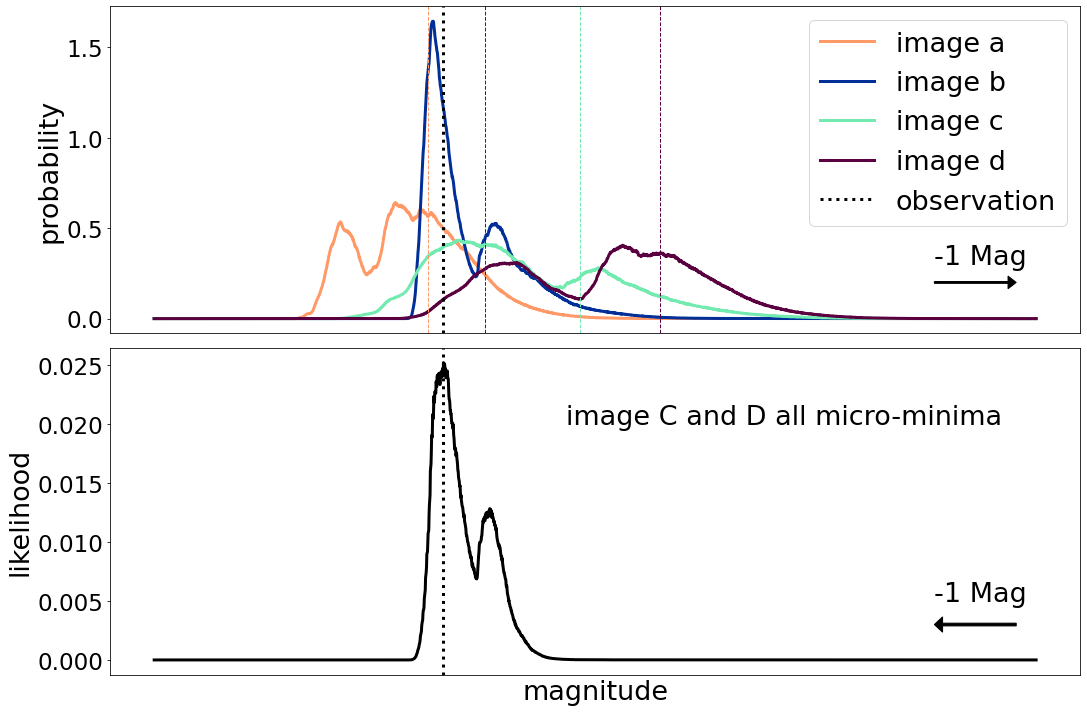

In [171]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(2, 1, figsize = [15,10], sharex = True)
ax0 = ax[0]
ax1 = ax[1]


ax0.plot(shifted_magnitudes_total, a30, linewidth = 3, color = colors[0], linestyle = 'solid', label = 'image a')
ax0.plot(shifted_magnitudes_total, b30, linewidth = 3, color = colors[1], linestyle = 'solid', label = 'image b')
ax0.plot(shifted_magnitudes_total, c30, linewidth = 3, color = colors[2], linestyle = 'solid', label = 'image c')
ax0.plot(shifted_magnitudes_total, d30, linewidth = 3, color = colors[3], linestyle = 'solid', label = 'image d')

ax0.axvline(x = -a_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[0])
ax0.axvline(x = -b_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[1])
ax0.axvline(x = -c_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[2])
ax0.axvline(x = -d_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[3])


multiplied_mag = a30*b30*c30*d30
all_unknown_likelihood = integrate.simps(multiplied_mag, x = shifted_magnitudes_total) 

ax1.plot(shifted_magnitudes_total, multiplied_mag, linewidth = 3, color = 'k', linestyle = 'solid')
ax0.axvline(0, color = 'k', linestyle = 'dotted', linewidth = 3, label = 'observation')
ax1.axvline(0, color = 'k', linestyle = 'dotted', linewidth = 3)

ax0.set_ylabel('probability', fontsize = 27)

ax1.set_xlabel('magnitude', fontsize = 27)
ax1.set_ylabel('likelihood', fontsize = 27)
ax1.get_xaxis().set_ticks([])

ax0.arrow(-6, 0.2, -1, 0, width = 0.01, head_width=0.07, head_length=0.1, color = 'k', length_includes_head = True)
ax0.text(-6, 0.3, "-1 Mag", color = 'k', fontsize = 27)  

ax1.arrow(-7, 0.003, 1, 0, width = 0.00023, head_width=0.0013, head_length=0.1, color = 'k', length_includes_head = True)
ax1.text(-6, 0.005, "-1 Mag", color = 'k', fontsize = 27)  
ax1.text(-1.5, 0.02, "image C and D all micro-minima", color = 'k', fontsize = 27)  

#fig.suptitle('all for a, b, c, and d', fontsize = 18)
ax0.legend(fontsize = 27, loc = 1)
ax0.invert_xaxis()


fig.tight_layout()
fig.savefig('figures/all.pdf')

## plot the c zero micro-minima PDFs and product

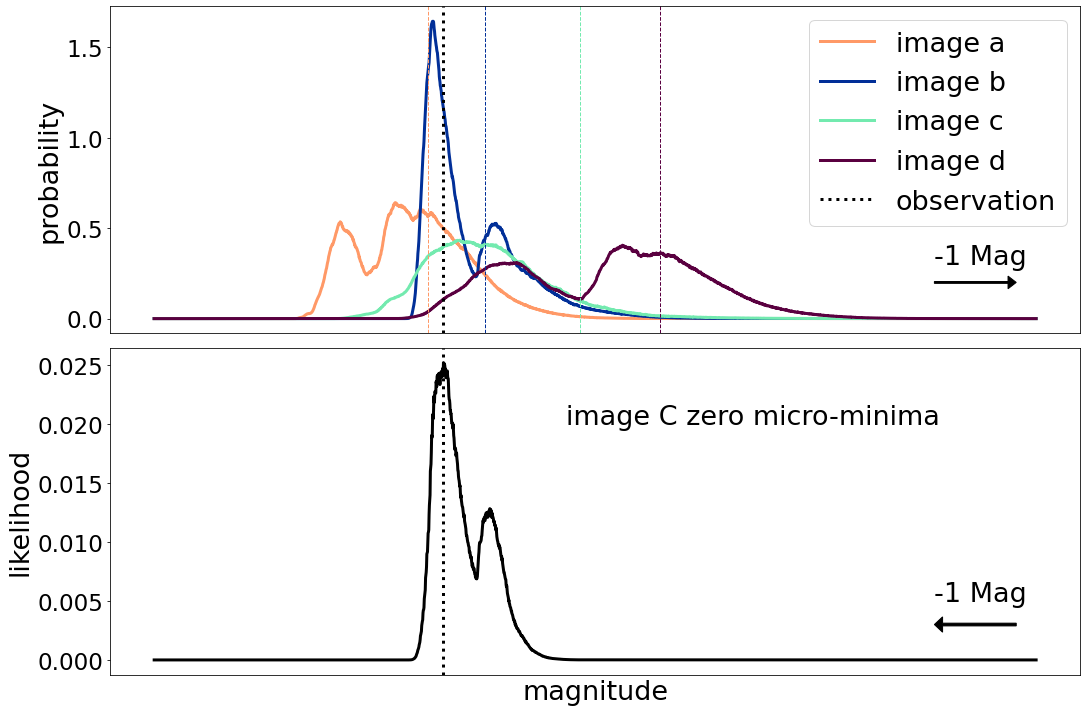

In [172]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(2, 1, figsize = [15,10], sharex = True)
ax0 = ax[0]
ax1 = ax[1]


ax0.plot(shifted_magnitudes_total, a30, linewidth = 3, color = colors[0], linestyle = 'solid', label = 'image a')
ax0.plot(shifted_magnitudes_total, b30, linewidth = 3, color = colors[1], linestyle = 'solid', label = 'image b')
ax0.plot(shifted_magnitudes_total, c_zero30, linewidth = 3, color = colors[2], linestyle = 'solid', label = 'image c')
ax0.plot(shifted_magnitudes_total, d30, linewidth = 3, color = colors[3], linestyle = 'solid', label = 'image d')

ax0.axvline(x = -a_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[0])
ax0.axvline(x = -b_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[1])
ax0.axvline(x = -c_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[2])
ax0.axvline(x = -d_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[3])


multiplied_mag = a30*b30*c_zero30*d30
czero_unknown_likelihood = integrate.simps(multiplied_mag, x = shifted_magnitudes_total) 

ax1.plot(shifted_magnitudes_total, multiplied_mag, linewidth = 3, color = 'k', linestyle = 'solid')
ax0.axvline(0, color = 'k', linestyle = 'dotted', linewidth = 3, label = 'observation')
ax1.axvline(0, color = 'k', linestyle = 'dotted', linewidth = 3)


ax0.set_ylabel('probability', fontsize = 27)

ax1.set_xlabel('magnitude', fontsize = 27)
ax1.set_ylabel('likelihood', fontsize = 27)
ax1.get_xaxis().set_ticks([])

ax0.arrow(-6, 0.2, -1, 0, width = 0.01, head_width=0.07, head_length=0.1, color = 'k', length_includes_head = True)
ax0.text(-6, 0.3, "-1 Mag", color = 'k', fontsize = 27)  

ax1.arrow(-7, 0.003, 1, 0, width = 0.00023, head_width=0.0013, head_length=0.1, color = 'k', length_includes_head = True)
ax1.text(-6, 0.005, "-1 Mag", color = 'k', fontsize = 27)   
ax1.text(-1.5, 0.02, "image C zero micro-minima", color = 'k', fontsize = 27)  

ax0.legend(fontsize = 27, loc = 1)
ax0.invert_xaxis()

fig.tight_layout()
fig.savefig('figures/zeroc.pdf')

## plot the d zero micro-minima PDFs and product

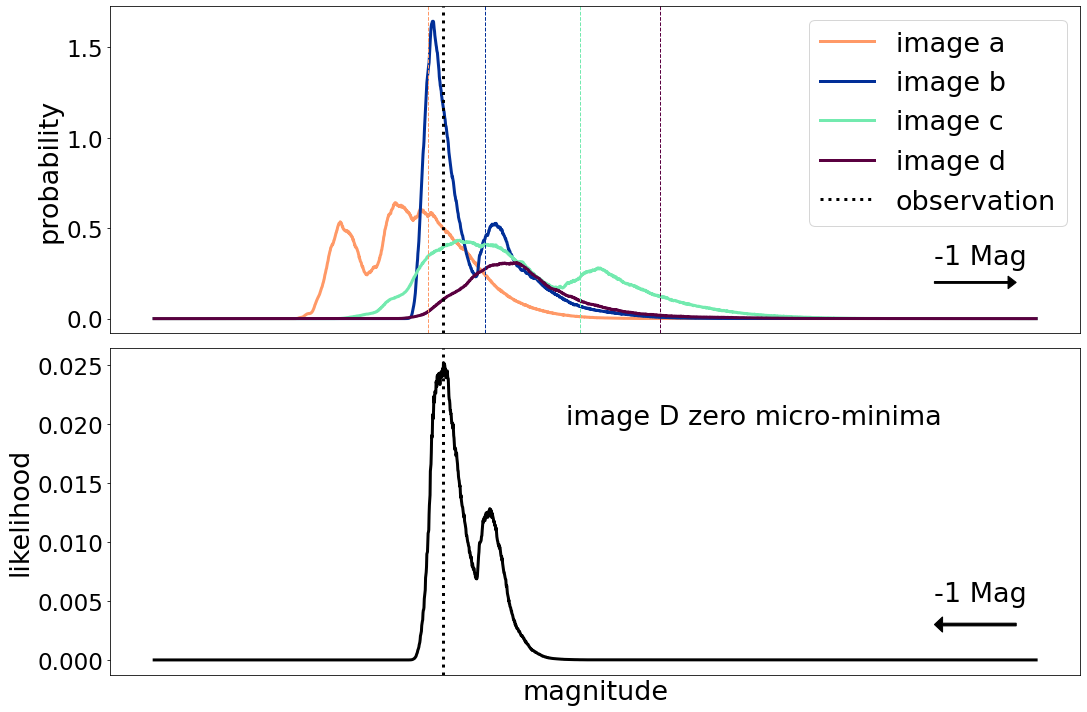

In [173]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(2, 1, figsize = [15,10], sharex = True)
ax0 = ax[0]
ax1 = ax[1]


ax0.plot(shifted_magnitudes_total, a30, linewidth = 3, color = colors[0], linestyle = 'solid', label = 'image a')
ax0.plot(shifted_magnitudes_total, b30, linewidth = 3, color = colors[1], linestyle = 'solid', label = 'image b')
ax0.plot(shifted_magnitudes_total, c30, linewidth = 3, color = colors[2], linestyle = 'solid', label = 'image c')
ax0.plot(shifted_magnitudes_total, d_zero30, linewidth = 3, color = colors[3], linestyle = 'solid', label = 'image d')

ax0.axvline(x = -a_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[0])
ax0.axvline(x = -b_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[1])
ax0.axvline(x = -c_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[2])
ax0.axvline(x = -d_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[3])


multiplied_mag = a30*b30*c30*d_zero30
dzero_unknown_likelihood = integrate.simps(multiplied_mag, x = shifted_magnitudes_total) 

ax1.plot(shifted_magnitudes_total, multiplied_mag, linewidth = 3, color = 'k', linestyle = 'solid')
ax0.axvline(0, color = 'k', linestyle = 'dotted', linewidth = 3, label = 'observation')
ax1.axvline(0, color = 'k', linestyle = 'dotted', linewidth = 3)


ax0.set_ylabel('probability', fontsize = 27)

ax1.set_xlabel('magnitude', fontsize = 27)
ax1.set_ylabel('likelihood', fontsize = 27)
ax1.get_xaxis().set_ticks([])

ax0.arrow(-6, 0.2, -1, 0, width = 0.01, head_width=0.07, head_length=0.1, color = 'k', length_includes_head = True)
ax0.text(-6, 0.3, "-1 Mag", color = 'k', fontsize = 27)  

ax1.arrow(-7, 0.003, 1, 0, width = 0.00023, head_width=0.0013, head_length=0.1, color = 'k', length_includes_head = True)
ax1.text(-6, 0.005, "-1 Mag", color = 'k', fontsize = 27)   
ax1.text(-1.5, 0.02, "image D zero micro-minima", color = 'k', fontsize = 27)  

#fig.suptitle('all for a, b, and zero for c, d', fontsize = 18)
ax0.legend(fontsize = 27, loc = 1)
ax0.invert_xaxis()

fig.tight_layout()
fig.savefig('figures/zerod.pdf')

## plot the c and d zero micro-minima PDFs and product


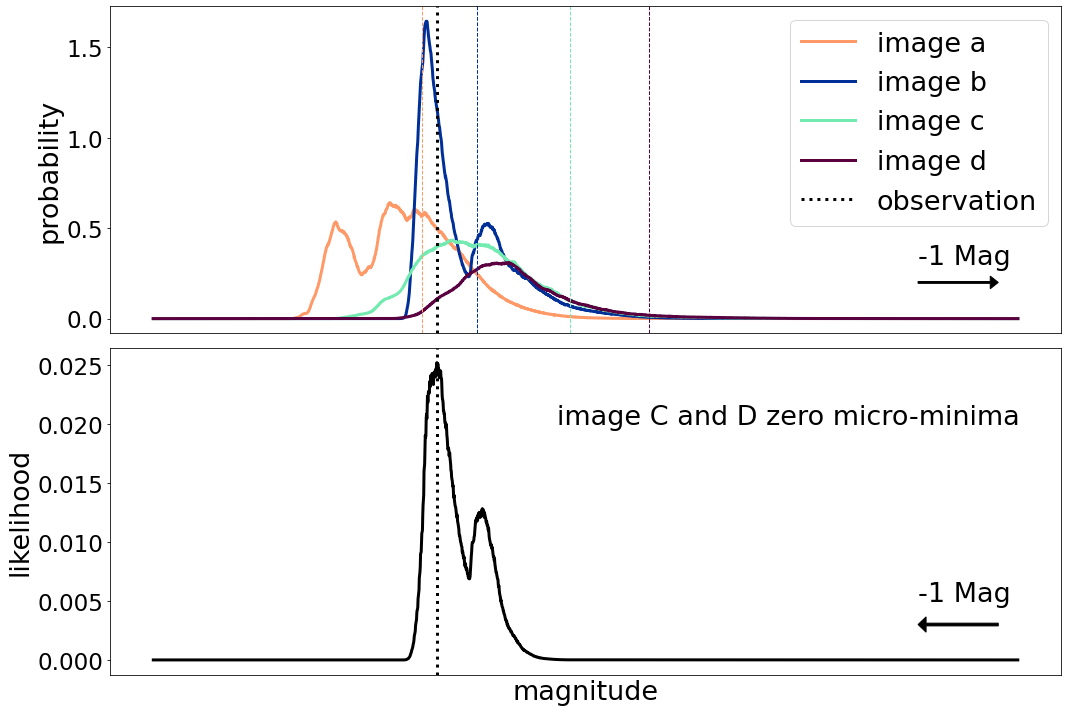

In [174]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(2, 1, figsize = [15,10], sharex = True)
ax0 = ax[0]
ax1 = ax[1]


ax0.plot(shifted_magnitudes_total, a30, linewidth = 3, color = colors[0], linestyle = 'solid', label = 'image a')
ax0.plot(shifted_magnitudes_total, b30, linewidth = 3, color = colors[1], linestyle = 'solid', label = 'image b')
ax0.plot(shifted_magnitudes_total, c_zero30, linewidth = 3, color = colors[2], linestyle = 'solid', label = 'image c')
ax0.plot(shifted_magnitudes_total, d_zero30, linewidth = 3, color = colors[3], linestyle = 'solid', label = 'image d')

ax0.axvline(x = -a_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[0])
ax0.axvline(x = -b_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[1])
ax0.axvline(x = -c_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[2])
ax0.axvline(x = -d_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[3])


multiplied_mag = a30*b30*c_zero30*d_zero30
cdzero_unknown_likelihood = integrate.simps(multiplied_mag, x = shifted_magnitudes_total) 

ax1.plot(shifted_magnitudes_total, multiplied_mag, linewidth = 3, color = 'k', linestyle = 'solid')
ax0.axvline(0, color = 'k', linestyle = 'dotted', linewidth = 3, label = 'observation')
ax1.axvline(0, color = 'k', linestyle = 'dotted', linewidth = 3)

ax0.set_ylabel('probability', fontsize = 27)

ax1.set_xlabel('magnitude', fontsize = 27)
ax1.set_ylabel('likelihood', fontsize = 27)
ax1.get_xaxis().set_ticks([])

ax0.arrow(-6, 0.2, -1, 0, width = 0.01, head_width=0.07, head_length=0.1, color = 'k', length_includes_head = True)
ax0.text(-6, 0.3, "-1 Mag", color = 'k', fontsize = 27)  

ax1.arrow(-7, 0.003, 1, 0, width = 0.00023, head_width=0.0013, head_length=0.1, color = 'k', length_includes_head = True)
ax1.text(-6, 0.005, "-1 Mag", color = 'k', fontsize = 27)   
ax1.text(-1.5, 0.02, "image C and D zero micro-minima", color = 'k', fontsize = 27)  

#fig.suptitle('all for a, b, and zero for c, d', fontsize = 18)
ax0.legend(fontsize = 27, loc = 1)
ax0.invert_xaxis()

fig.tight_layout()
fig.savefig('figures/zerocd.pdf')

## Ok, let's print all of our likelihoods for comparison:

In [175]:
print('\n',
    'all micro-minima all images known likelihood = ', np.round(all_known_likelihood, 5), '\n',
    'c zero micro-minima known likelihood = ', np.round(czero_known_likelihood, 5),  '\n',
    'd zero micro-minima known likelihood = ', np.round(dzero_known_likelihood, 5),  '\n',
    'c and d zero micro-minima known likelihood = ', np.round(cdzero_known_likelihood, 5))


print('\n',
    'all micro-minima all images unknown likelihood = ', np.round(all_unknown_likelihood, 5), '\n',
    'c zero micro-minima unknown likelihood = ', np.round(czero_unknown_likelihood, 5),  '\n',
    'd zero micro-minima unknown likelihood = ', np.round(dzero_unknown_likelihood, 5),  '\n',
    'c and d zero micro-minima unknown likelihood = ', np.round(cdzero_unknown_likelihood, 5))


 all micro-minima all images known likelihood =  0.0252 
 c zero micro-minima known likelihood =  0.0252 
 d zero micro-minima known likelihood =  0.0252 
 c and d zero micro-minima known likelihood =  0.0252

 all micro-minima all images unknown likelihood =  0.01542 
 c zero micro-minima unknown likelihood =  0.01542 
 d zero micro-minima unknown likelihood =  0.01542 
 c and d zero micro-minima unknown likelihood =  0.01542


## Now, let's determine the probability:

In [176]:
print('\n',
    'c zero micro-minima known probability = ', np.round(czero_known_likelihood / all_known_likelihood, 5),  '\n',
    'd zero micro-minima known probability = ', np.round(dzero_known_likelihood / all_known_likelihood, 5),  '\n',
    'c and d zero micro-minima known probability = ', np.round(cdzero_known_likelihood / all_known_likelihood, 5))


print('\n',
    'c zero micro-minima unknown probability = ', np.round(czero_unknown_likelihood / all_unknown_likelihood, 5),  '\n',
    'd zero micro-minima unknown probability = ', np.round(dzero_unknown_likelihood / all_unknown_likelihood, 5),  '\n',
    'c and d zero micro-minima unknown probability = ', np.round(cdzero_unknown_likelihood / all_unknown_likelihood, 5))


 c zero micro-minima known probability =  1.0 
 d zero micro-minima known probability =  1.0 
 c and d zero micro-minima known probability =  1.0

 c zero micro-minima unknown probability =  0.99952 
 d zero micro-minima unknown probability =  0.99974 
 c and d zero micro-minima unknown probability =  0.99945


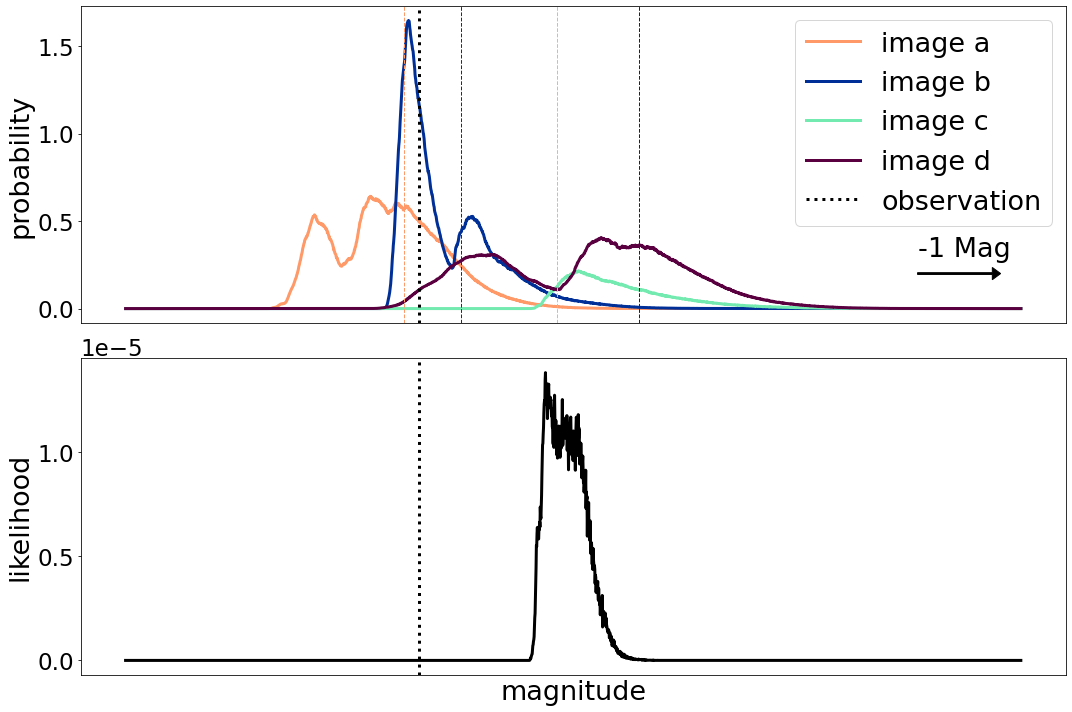

In [177]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(2, 1, figsize = [15,10], sharex = True)
ax0 = ax[0]
ax1 = ax[1]


ax0.plot(shifted_magnitudes_total, a30, linewidth = 3, color = colors[0], linestyle = 'solid', label = 'image a')
ax0.plot(shifted_magnitudes_total, b30, linewidth = 3, color = colors[1], linestyle = 'solid', label = 'image b')
ax0.plot(shifted_magnitudes_total, c_1throughn30, linewidth = 3, color = colors[2], linestyle = 'solid', label = 'image c')
ax0.plot(shifted_magnitudes_total, d30, linewidth = 3, color = colors[3], linestyle = 'solid', label = 'image d')

ax0.axvline(x = -a_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[0])
ax0.axvline(x = -b_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[1])
ax0.axvline(x = -c_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[2])
ax0.axvline(x = -d_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[3])


multiplied_mag = a30*b30*c_1throughn30*d30
c1throughn_unknown_likelihood = integrate.simps(multiplied_mag, x = shifted_magnitudes_total) 

ax1.plot(shifted_magnitudes_total, multiplied_mag, linewidth = 3, color = 'k', linestyle = 'solid')
ax0.axvline(0, color = 'k', linestyle = 'dotted', linewidth = 3, label = 'observation')
ax1.axvline(0, color = 'k', linestyle = 'dotted', linewidth = 3)

ax0.set_ylabel('probability', fontsize = 27)

ax1.set_xlabel('magnitude', fontsize = 27)
ax1.set_ylabel('likelihood', fontsize = 27)
ax1.get_xaxis().set_ticks([])

ax0.arrow(-6, 0.2, -1, 0, width = 0.01, head_width=0.07, head_length=0.1, color = 'k', length_includes_head = True)
ax0.text(-6, 0.3, "-1 Mag", color = 'k', fontsize = 27)  

#ax1.arrow(-7, 0.003, 1, 0, width = 0.00023, head_width=0.0013, head_length=0.1, color = 'k', length_includes_head = True)
#ax1.text(-6, 0.005, "-1 Mag", color = 'k', fontsize = 27)   
#ax1.text(-1.5, 0.02, "image C and D zero micro-minima", color = 'k', fontsize = 27)  

#fig.suptitle('all for a, b, and zero for c, d', fontsize = 18)
ax0.legend(fontsize = 27, loc = 1)
ax0.invert_xaxis()

fig.tight_layout()


## Let's run a quick monte carlo

In [ ]:
#magnitudes_total, aligned_normed_count
from numpy import random

nsamples = 10
shifts =[[],[],[],[],[],[]]
for ii in range(0,nsamples):
    area_shifts = random.rand(6)
    for jj in range(0, 6):
        shift_found = False
        index = 1
        while not shift_found:
            area = integrate.simps(aligned_normed_count[jj][0:index], x = magnitudes_total[0:index]) 
            if area > area_shifts[jj]:
                shifts[jj].append(magnitudes_total[index])
                shift_found = True
            
            index += 1
        
    



In [ ]:
known_likelihoods = []
unknown_likelihoods = []
for ii in range(0, nsamples):
    a_shifted_mag = magnitudes_total+np.round(shifts[0][ii],3)
    b_shifted_mag = magnitudes_total+np.round(shifts[1][ii],3)
    c_shifted_mag = magnitudes_total+np.round(shifts[2][ii],3)
    d_shifted_mag = magnitudes_total+np.round(shifts[3][ii],3)
    czero_shifted_mag = magnitudes_total+shifts[4][ii]
    dzero_shifted_mag = magnitudes_total+shifts[5][ii]
    
    shifted_mags = [a_shifted_mag, b_shifted_mag, c_shifted_mag, d_shifted_mag, czero_shifted_mag, dzero_shifted_mag]
    shifted_magnitudes_total, normed_count_shift = align_magnitude_bins(shifted_mags, aligned_normed_count)
    
    
    length = np.min(np.array([len(a30), len(b30), len(c30), len(d30), len(c_zero30), len(d_zero30)]))
    a30 = normed_count_shift[0][:length]
    b30 = normed_count_shift[1][:length]
    c30 = normed_count_shift[2][:length]
    d30 = normed_count_shift[3][:length]
    c_zero30 = normed_count_shift[4][:length]
    d_zero30 = normed_count_shift[5][:length]
    
    shifted_magnitudes_total = shifted_magnitudes_total[:length]

    all_multiply = a30*b30*c30*d30
    czero_multiply = a30*b30*c_zero30*d30
    dzero_multiply = a30*b30*c30*d_zero30
    cdzero_multiply = a30*b30*c_zero30*d_zero30
    
    observation_index = np.where(shifted_magnitudes_total == find_nearest(shifted_magnitudes_total, 0))[0][0]
    
    #determine likelihood at observation
    sim_all_known_likelihood = all_multiply[observation_index]
    sim_czero_known_likelihood = czero_multiply[observation_index]
    sim_dzero_known_likelihood = dzero_multiply[observation_index]
    sim_cdzero_known_likelihood = cdzero_multiply[observation_index]
    
    known_likelihoods.append([sim_all_known_likelihood, sim_czero_known_likelihood, sim_dzero_known_likelihood, sim_cdzero_known_likelihood])
    
    #determine total likelihood under curve
    sim_all_unknown_likelihood = integrate.simps(all_multiply) 
    sim_czero_unknown_likelihood = integrate.simps(czero_multiply) 
    sim_dzero_unknown_likelihood = integrate.simps(dzero_multiply) 
    sim_cdzero_unknown_likelihood = integrate.simps(cdzero_multiply) 
    
    
    unknown_likelihoods.append([sim_all_unknown_likelihood, sim_czero_unknown_likelihood, sim_dzero_unknown_likelihood, sim_cdzero_unknown_likelihood])

    
    

In [ ]:
known_likelihoods = np.array(known_likelihoods)


bins_known_likelihood = np.logspace(np.log10(0.00001), np.log10(np.max(known_likelihoods)), 50)
labels = ['all micro-minima monte carlo', 'c zero micro-minima monte carlo', 'd zero micro-minima monte carlo', 'c and d zero micro-minima monte carlo']

hist_colors = ["#530026", "#003971", "#237065", "#cd6645"]
fig, ax = plt.subplots(1, figsize = [15,10])

ax.axvline(all_known_likelihood, 0, 1, label = 'all micro-minima likelihood', color = 'k', linestyle = 'solid')
ax.axvline(czero_known_likelihood, 0, 1, label = 'c zero micro-minima likelihood', color = 'k', linestyle = 'dashed')
ax.axvline(dzero_known_likelihood, 0, 1, label = 'd zero micro-minima likelihood', color = 'k', linestyle = 'dotted')
ax.axvline(cdzero_known_likelihood, 0, 1, label = 'c and d zero micro-minima likelihood', color = 'k', linestyle = 'dashdot')
for ii in range(0,4):
    ax.hist(known_likelihoods[:,ii], alpha = 0.7, label = labels[ii], bins = bins_known_likelihood, color = hist_colors[ii])
    ax.set_xscale('log')

ax.set_xlabel('likelihood', fontsize = 27)
ax.set_ylabel('count', fontsize = 27)
ax.legend(fontsize = 13)

fig.savefig('figures/hist_together.pdf')

In [ ]:
fig, ax = plt.subplots(4,1, figsize = [15,45])


ax[0].axvline(all_known_likelihood, 0, 1, label = 'all micro-minima likelihood', color = 'k', linestyle = 'solid')
ax[1].axvline(czero_known_likelihood, 0, 1, label = 'c zero micro-minima likelihood', color = 'k', linestyle = 'dashed')
ax[2].axvline(dzero_known_likelihood, 0, 1, label = 'd zero micro-minima likelihood', color = 'k', linestyle = 'dotted')
ax[3].axvline(cdzero_known_likelihood, 0, 1, label = 'c and d zero micro-minima likelihood', color = 'k', linestyle = 'dashdot')
for ii in range(0,4):
    ax[ii].hist(known_likelihoods[:,ii], alpha = 0.7, label = labels[ii], bins = bins_known_likelihood, color = hist_colors[ii])
    ax[ii].set_xscale('log')
    ax[ii].set_xlabel('likelihood', fontsize = 27)
    ax[ii].set_ylabel('count', fontsize = 27)
    ax[ii].legend(fontsize = 18)
    
fig.savefig('figures/hist_separate.pdf')

In [ ]:
fig, ax = plt.subplots(1,2, figsize = [20,10])


ax[0].axvline(all_known_likelihood, 0, 0.8, label = 'all micro-minima likelihood', color = 'k', linestyle = 'dashed')
ax[1].axvline(dzero_known_likelihood, 0, 0.8, label = 'd zero micro-minima likelihood', color = 'k', linestyle = 'dashed')

ax[0].hist(known_likelihoods[:,0], alpha = 0.7, label = labels[0], bins = bins_known_likelihood, color = hist_colors[0])
ax[1].hist(known_likelihoods[:,2], alpha = 0.7, label = labels[2], bins = bins_known_likelihood, color = hist_colors[2])

ax[0].axvline(np.median(known_likelihoods[:,0]), 0, 0.8, color = 'k', linestyle = 'solid',  label = 'median')
ax[1].axvline(np.median(known_likelihoods[:,2]), 0, 0.8, color = 'k', linestyle = 'solid',  label = 'median')



ax[0].set_xscale('log')
ax[0].set_xlabel('likelihood', fontsize = 27)
ax[0].set_ylabel('count', fontsize = 27)
ax[0].legend(fontsize = 18)
ax[0].set_ylim(0, 100)

ax[1].set_xscale('log')
ax[1].set_xlabel('likelihood', fontsize = 27)
ax[1].set_ylabel('count', fontsize = 27)
ax[1].legend(fontsize = 18)
ax[1].set_ylim(0, 100)


    
fig.savefig('figures/hist_separate_onlyD.pdf')

In [183]:
multiplied_mag_c1throughn = a30*b30*c_1throughn30*d30
c1throughn_unknown_likelihood = integrate.simps(multiplied_mag_c1throughn, x = shifted_magnitudes_total) 
index = np.where(multiplied_mag_c1throughn == np.max(multiplied_mag_c1throughn))
unmagnified_mag_1throughn = np.round(shifted_magnitudes_total[index][0],2)

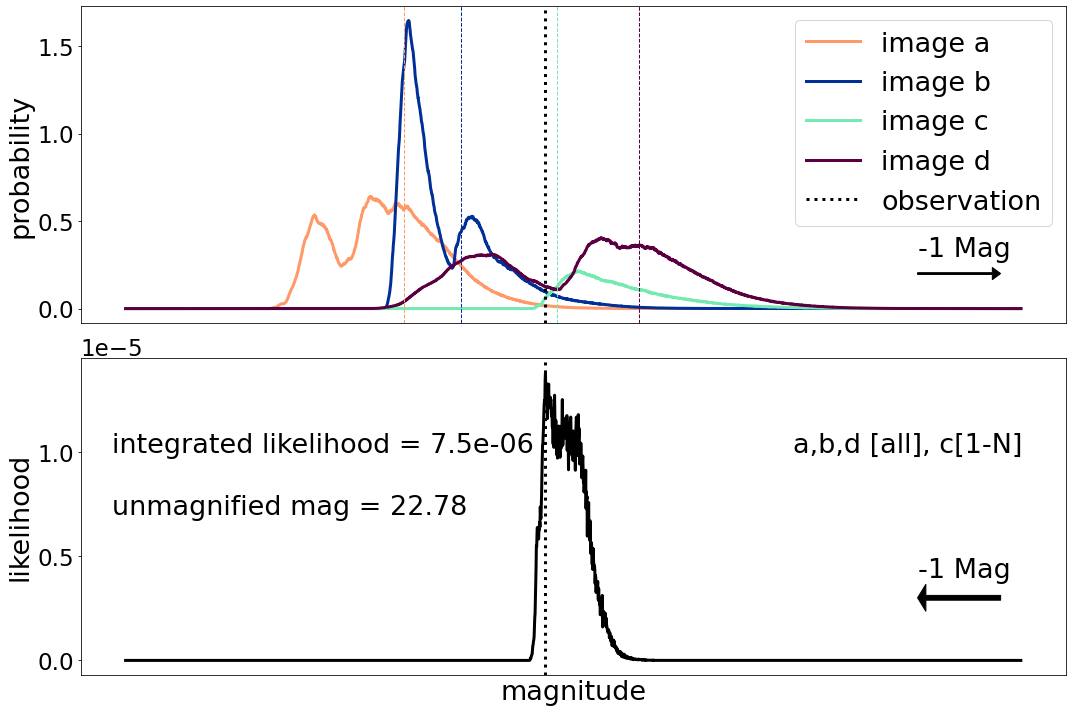

In [208]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(2, 1, figsize = [15,10], sharex = True)
ax0 = ax[0]
ax1 = ax[1]


ax0.plot(shifted_magnitudes_total, a30, linewidth = 3, color = colors[0], linestyle = 'solid', label = 'image a')
ax0.plot(shifted_magnitudes_total, b30, linewidth = 3, color = colors[1], linestyle = 'solid', label = 'image b')
ax0.plot(shifted_magnitudes_total, c_1throughn30, linewidth = 3, color = colors[2], linestyle = 'solid', label = 'image c')
ax0.plot(shifted_magnitudes_total, d30, linewidth = 3, color = colors[3], linestyle = 'solid', label = 'image d')

ax0.axvline(x = -a_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[0])
ax0.axvline(x = -b_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[1])
ax0.axvline(x = -c_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[2])
ax0.axvline(x = -d_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[3])


multiplied_mag = a30*b30*c_1throughn30*d30
c1throughn_unknown_likelihood = integrate.simps(multiplied_mag, x = shifted_magnitudes_total) 

ax1.plot(shifted_magnitudes_total, multiplied_mag, linewidth = 3, color = 'k', linestyle = 'solid')
ax0.axvline(unmagnified_mag_1throughn, color = 'k', linestyle = 'dotted', linewidth = 3, label = 'observation')
ax1.axvline(unmagnified_mag_1throughn, color = 'k', linestyle = 'dotted', linewidth = 3)

ax0.set_ylabel('probability', fontsize = 27)

ax1.set_xlabel('magnitude', fontsize = 27)
ax1.set_ylabel('likelihood', fontsize = 27)
ax1.get_xaxis().set_ticks([])

ax0.arrow(-6, 0.2, -1, 0, width = 0.01, head_width=0.07, head_length=0.1, color = 'k', length_includes_head = True)
ax0.text(-6, 0.3, "-1 Mag", color = 'k', fontsize = 27)  

ax1.arrow(-7, 0.000003, 1, 0, width = 0.00000023, head_width=0.0000013, head_length=0.1, color = 'k', length_includes_head = True)
ax1.text(-6, 0.000004, "-1 Mag", color = 'k', fontsize = 27)   
ax1.text(-4.5, 0.00001, "a,b,d [all], c[1-N]", color = 'k', fontsize = 27)  
ax1.text(3.7, 0.000007, "unmagnified mag = " + str(np.round(unmagnified_mag[0] - unmagnified_mag_1throughn, 3)), color = 'k', fontsize = 27)  
ax1.text(3.7, 0.00001, "integrated likelihood = " + str(np.round(c1throughn_unknown_likelihood, 7)), color = 'k', fontsize = 27)  


#fig.suptitle('a,b,d [all], c[1-N]', fontsize = 18)
ax0.legend(fontsize = 27, loc = 1)
ax0.invert_xaxis()

fig.tight_layout()

plt.savefig('figures/c_test_figures/c[1-N].pdf')


In [185]:
multiplied_mag_c0 = a30*b30*c30*d30
c0_unknown_likelihood = integrate.simps(multiplied_mag_c0, x = shifted_magnitudes_total) 
index = np.where(multiplied_mag_c0 == np.max(multiplied_mag_c0))
unmagnified_mag_c0 = np.round(shifted_magnitudes_total[index][0], 2)

In [186]:
print(unmagnified_mag_c0)

-0.0


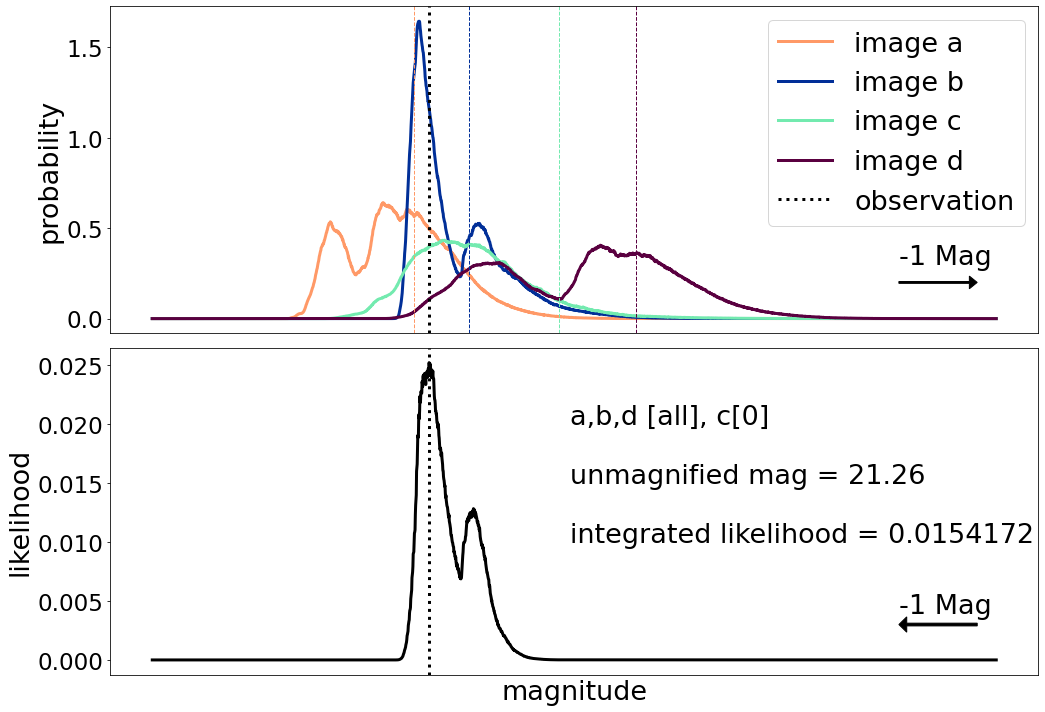

In [209]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(2, 1, figsize = [15,10], sharex = True)
ax0 = ax[0]
ax1 = ax[1]


ax0.plot(shifted_magnitudes_total, a30, linewidth = 3, color = colors[0], linestyle = 'solid', label = 'image a')
ax0.plot(shifted_magnitudes_total, b30, linewidth = 3, color = colors[1], linestyle = 'solid', label = 'image b')
ax0.plot(shifted_magnitudes_total, c_zero30, linewidth = 3, color = colors[2], linestyle = 'solid', label = 'image c')
ax0.plot(shifted_magnitudes_total, d30, linewidth = 3, color = colors[3], linestyle = 'solid', label = 'image d')

ax0.axvline(x = -a_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[0])
ax0.axvline(x = -b_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[1])
ax0.axvline(x = -c_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[2])
ax0.axvline(x = -d_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[3])


multiplied_mag = a30*b30*c_zero30*d30
c0_unknown_likelihood = integrate.simps(multiplied_mag, x = shifted_magnitudes_total) 

ax1.plot(shifted_magnitudes_total, multiplied_mag, linewidth = 3, color = 'k', linestyle = 'solid')
ax0.axvline(unmagnified_mag_c0, color = 'k', linestyle = 'dotted', linewidth = 3, label = 'observation')
ax1.axvline(unmagnified_mag_c0, color = 'k', linestyle = 'dotted', linewidth = 3)

ax0.set_ylabel('probability', fontsize = 27)

ax1.set_xlabel('magnitude', fontsize = 27)
ax1.set_ylabel('likelihood', fontsize = 27)
ax1.get_xaxis().set_ticks([])

ax0.arrow(-6, 0.2, -1, 0, width = 0.01, head_width=0.07, head_length=0.1, color = 'k', length_includes_head = True)
ax0.text(-6, 0.3, "-1 Mag", color = 'k', fontsize = 27)  

ax1.arrow(-7, 0.003, 1, 0, width = 0.00023, head_width=0.0013, head_length=0.1, color = 'k', length_includes_head = True)
ax1.text(-6, 0.004, "-1 Mag", color = 'k', fontsize = 27)   
ax1.text(-1.8, 0.02, "a,b,d [all], c[0]", color = 'k', fontsize = 27)  
ax1.text(-1.8, 0.015, "unmagnified mag = " + str(np.round(unmagnified_mag[0] - unmagnified_mag_c0, 3)), color = 'k', fontsize = 27)  
ax1.text(-1.8, 0.01, "integrated likelihood = " + str(np.round(c0_unknown_likelihood, 7)), color = 'k', fontsize = 27)  


#fig.suptitle('a,b,d [all], c[1-N]', fontsize = 18)
ax0.legend(fontsize = 27, loc = 1)
ax0.invert_xaxis()

fig.tight_layout()

plt.savefig('figures/c_test_figures/c[0].pdf')

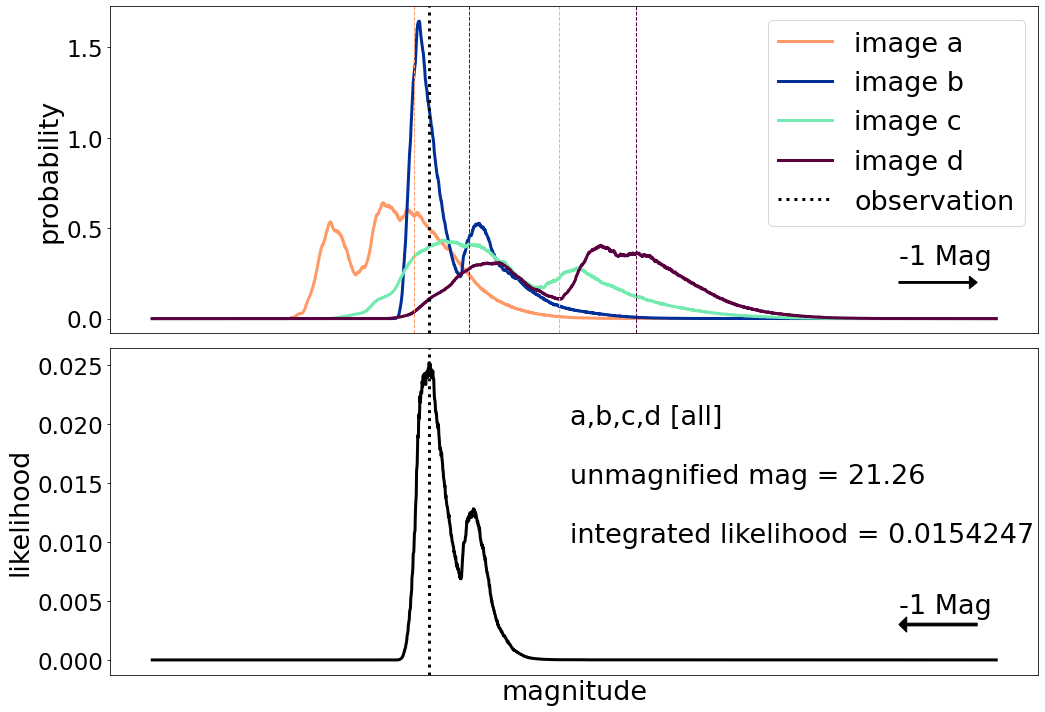

In [210]:
colors = ['#ff9967', '#012f98', '#73eaaf', '#5a0040']
fig, ax = plt.subplots(2, 1, figsize = [15,10], sharex = True)
ax0 = ax[0]
ax1 = ax[1]


ax0.plot(shifted_magnitudes_total, a30, linewidth = 3, color = colors[0], linestyle = 'solid', label = 'image a')
ax0.plot(shifted_magnitudes_total, b30, linewidth = 3, color = colors[1], linestyle = 'solid', label = 'image b')
ax0.plot(shifted_magnitudes_total, c30, linewidth = 3, color = colors[2], linestyle = 'solid', label = 'image c')
ax0.plot(shifted_magnitudes_total, d30, linewidth = 3, color = colors[3], linestyle = 'solid', label = 'image d')

ax0.axvline(x = -a_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[0])
ax0.axvline(x = -b_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[1])
ax0.axvline(x = -c_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[2])
ax0.axvline(x = -d_obs_minus_predicted, ymin = 0, ymax = 1, linewidth=1, linestyle = 'dashed', color = colors[3])


multiplied_mag = a30*b30*c30*d30
call_unknown_likelihood = integrate.simps(multiplied_mag, x = shifted_magnitudes_total) 

ax1.plot(shifted_magnitudes_total, multiplied_mag, linewidth = 3, color = 'k', linestyle = 'solid')
ax0.axvline(unmagnified_mag_c0, color = 'k', linestyle = 'dotted', linewidth = 3, label = 'observation')
ax1.axvline(unmagnified_mag_c0, color = 'k', linestyle = 'dotted', linewidth = 3)

ax0.set_ylabel('probability', fontsize = 27)

ax1.set_xlabel('magnitude', fontsize = 27)
ax1.set_ylabel('likelihood', fontsize = 27)
ax1.get_xaxis().set_ticks([])

ax0.arrow(-6, 0.2, -1, 0, width = 0.01, head_width=0.07, head_length=0.1, color = 'k', length_includes_head = True)
ax0.text(-6, 0.3, "-1 Mag", color = 'k', fontsize = 27)  

ax1.arrow(-7, 0.003, 1, 0, width = 0.00023, head_width=0.0013, head_length=0.1, color = 'k', length_includes_head = True)
ax1.text(-6, 0.004, "-1 Mag", color = 'k', fontsize = 27)   
ax1.text(-1.8, 0.02, "a,b,c,d [all]", color = 'k', fontsize = 27)  
ax1.text(-1.8, 0.015, "unmagnified mag = " + str(np.round(unmagnified_mag[0], 3)), color = 'k', fontsize = 27)  
ax1.text(-1.8, 0.01, "integrated likelihood = " + str(np.round(call_unknown_likelihood, 7)), color = 'k', fontsize = 27)  


#fig.suptitle('a,b,d [all], c[1-N]', fontsize = 18)
ax0.legend(fontsize = 27, loc = 1)
ax0.invert_xaxis()

fig.tight_layout()
plt.savefig('figures/c_test_figures/c[all].pdf')

In [211]:
print('integrated likelihood c[0] = ' + str(np.round(c0_unknown_likelihood, 7)))
print('integrated likelihood c[1-N] = ' + str(np.round(c1throughn_unknown_likelihood, 7)))
print('integrated likelihood c[all] = ' + str(np.round(call_unknown_likelihood, 7)))


integrated likelihood c[0] = 0.0154172
integrated likelihood c[1-N] = 7.5e-06
integrated likelihood c[all] = 0.0154247


In [213]:
print('most probable unmagnified magnitude c[0] = ' + str(np.round(unmagnified_mag[0] - unmagnified_mag_c0, 7)))
print('most probable unmagnified magnitude c[1-N] = ' + str(np.round(unmagnified_mag[0] - unmagnified_mag_1throughn, 7)))
print('most probable unmagnified magnitude c[all] = ' + str(np.round(unmagnified_mag[0], 7)))


most probable unmagnified magnitude c[0] = 21.26
most probable unmagnified magnitude c[1-N] = 22.78
most probable unmagnified magnitude c[all] = 21.26
